In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
import os

# Mounting Google Drive for getting access to input and output folders
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the data
data = pd.read_csv('/content/drive/MyDrive/Dissertation Aditya Parmar : testing of Large Lang. Model/100_GPT_withmanual_metrics.csv')


In [ ]:
# Displaying given column names
print("Available columns:")
print(data.columns.tolist())

# Using a function to calculate percentage above threshold
def percentage_above_threshold(series, threshold):
    return (series > threshold).mean() * 100

# Function to calculate percentage below threshold
def percentage_below_threshold(series, threshold):
    return (series < threshold).mean() * 100

# Calculating metrics
total_images = len(data)
ssim_above_085 = percentage_above_threshold(data['SSIM'], 0.85)
ssim_above_075 = percentage_above_threshold(data['SSIM'], 0.75)
ssim_above_065 = percentage_above_threshold(data['SSIM'], 0.65)
clip_above_085 = percentage_above_threshold(data['CLIP'], 0.85)
clip_above_075 = percentage_above_threshold(data['CLIP'], 0.75)
clip_above_065 = percentage_above_threshold(data['CLIP'], 0.65)
pixel_below_15 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 15)
pixel_below_25 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 25)
pixel_below_35 = percentage_below_threshold(data['PixelMatch_DiffPercentage'], 35)

# Identifing manual evaluation columns
manual_columns = [col for col in data.columns if col.startswith('Manual_')]

# Calculating average manual scores
manual_averages = data[manual_columns].mean()

# Creating summary table
summary_data = {
    'Metric': [
        'SSIM > 0.85', 'SSIM > 0.75', 'SSIM > 0.65',
        'CLIP > 0.85', 'CLIP > 0.75', 'CLIP > 0.65',
        'PixelMatch Diff < 15%', 'PixelMatch Diff < 25%', 'PixelMatch Diff < 35%'
    ] + manual_columns,
    'Value': [
        f"{ssim_above_085:.2f}%", f"{ssim_above_075:.2f}%", f"{ssim_above_065:.2f}%",
        f"{clip_above_085:.2f}%", f"{clip_above_075:.2f}%", f"{clip_above_065:.2f}%",
        f"{pixel_below_15:.2f}%", f"{pixel_below_25:.2f}%", f"{pixel_below_35:.2f}%"
    ] + [f"{score:.2f}" for score in manual_averages]
}

summary_data = pd.DataFrame(summary_data)

# Displaying the summary table
print("\nSummary Table:")
print(summary_data.to_string(index=False))
print(f"\nTotal images analyzed: {total_images}")

# Optional: Save the summary table as a CSV file
summary_data.to_csv('image_metrics_summary_with_manual.csv', index=False)
print("\nSummary table saved as 'image_metrics_summary_with_manual.csv'")

# Additional analysis: Correlation between automated and manual metrics
auto_metrics = ['SSIM', 'PixelMatch_DiffPercentage', 'CLIP']
correlation_matrix = data[auto_metrics + manual_columns].corr()

print("\nCorrelation between automated and manual metrics:")
print(correlation_matrix[auto_metrics][manual_columns].to_string())

Available columns:
['Image', 'SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid', 'Semantic_Precision', 'Semantic_Recall', 'Unnamed: 7', 'Manual_Content_Accuracy ', 'Manual_Layout_Structure', 'Manual_Styling', 'Manual_Functionality_Indicators', 'Manual_Visual_Elements']

Summary Table:
                         Metric  Value
                    SSIM > 0.85  5.10%
                    SSIM > 0.75 41.84%
                    SSIM > 0.65 74.49%
                    CLIP > 0.85  0.00%
                    CLIP > 0.75 29.59%
                    CLIP > 0.65 60.20%
          PixelMatch Diff < 15% 26.53%
          PixelMatch Diff < 25% 51.02%
          PixelMatch Diff < 35% 59.18%
       Manual_Content_Accuracy    3.69
        Manual_Layout_Structure   3.43
                 Manual_Styling   3.71
Manual_Functionality_Indicators   4.19
         Manual_Visual_Elements   3.58

Total images analyzed: 98

Summary table saved as 'image_metrics_summary_with_manual.csv'

Correlation between automated 

KeyError: "None of [Index(['Manual_Content_Accuracy ', 'Manual_Layout_Structure', 'Manual_Styling',\n       'Manual_Functionality_Indicators', 'Manual_Visual_Elements'],\n      dtype='object')] are in the [columns]"

In [ ]:
data.sample(30)

,Image,SSIM,PixelMatch_DiffPercentage,CLIP,HTML_Valid,Semantic_Precision,Semantic_Recall,Unnamed: 7,Manual_Content_Accuracy,Manual_Layout_Structure,Manual_Styling,Manual_Functionality_Indicators,Manual_Visual_Elements
14,forteantimes.com,0.393623,62.114153,0.585292,True,0.071429,0.428571,NaN,4,3,3,4,4
82,sketch_59,0.771885,48.072218,0.744591,True,0.222222,0.571429,NaN,4,2,3,4,3
95,sketch_35,0.670284,15.642475,0.625266,True,0.000000,0.000000,NaN,3,4,4,4,3
89,sketch_160,0.769427,15.703382,0.641666,True,0.027778,0.142857,NaN,2,3,3,4,3
17,fleetnews.co.uk,0.662023,46.018972,0.689279,True,0.153846,0.857143,NaN,1,1,2,4,2
96,sketch_153,0.821393,44.569406,0.598851,True,0.085714,0.428571,NaN,4,4,4,4,3
46,rw_994,0.790506,7.472331,0.771767,True,0.000000,0.000000,NaN,5,5,5,5,5
45,sketch_0,0.734348,12.930917,0.566301,True,0.147059,0.714286,NaN,2,3,2,4,3
21,fakcimile.ru,0.630384,21.920166,0.613905,True,0.125000,0.857143,NaN,3,2,4,3,3
2,67C7A591-4BB3-4A35-9493-F852B2AC3A6A,0.797315,12.892391,0.831068,True,0.097561,0.571429,NaN,5,4,3,3,3


Column names in the dataset:
Index(['Image', 'SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid',
       'Semantic_Precision', 'Semantic_Recall', 'Unnamed: 7',
       'Manual_Content_Accuracy ', 'Manual_Layout_Structure', 'Manual_Styling',
       'Manual_Functionality_Indicators', 'Manual_Visual_Elements'],
      dtype='object')

Column info after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SSIM                             98 non-null     float64
 1   PixelMatch_DiffPercentage        98 non-null     float64
 2   CLIP                             98 non-null     float64
 3   HTML_Valid                       98 non-null     int64  
 4   Semantic_Precision               98 non-null     float64
 5   Semantic_Recall                  98 non-null     float64
 6   Manual_Content_Accuracy     

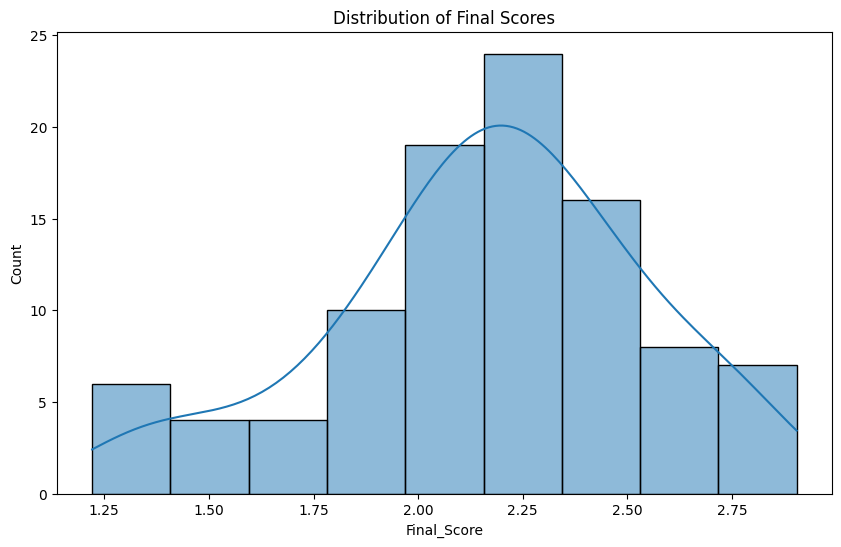


Conclusions and Insights:
1. Correlation between automatic and manual metrics: [Your observations]
2. Significant relationships identified: [Your insights]
3. Performance across different types of images/websites: [Your analysis]
4. Strengths and weaknesses of GPT-4 in HTML/CSS generation: [Your conclusions]
5. Recommendations for improvement: [Your suggestions]


In [ ]:


# Printing column names to verify
print("Column names in the dataset:")
print(data.columns)

# List of automatic and manual metrics (adjusted for potential spaces)
auto_metrics = ['SSIM', 'PixelMatch_DiffPercentage', 'CLIP', 'HTML_Valid', 'Semantic_Precision', 'Semantic_Recall']
manual_metrics = ['Manual_Content_Accuracy ', 'Manual_Layout_Structure', 'Manual_Styling',
                  'Manual_Functionality_Indicators', 'Manual_Visual_Elements']

# Verifying if all columns exist
missing_columns = [col for col in auto_metrics + manual_metrics if col not in data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # Remove missing columns from the lists
    auto_metrics = [col for col in auto_metrics if col in data.columns]
    manual_metrics = [col for col in manual_metrics if col in data.columns]

# Converting HTML_Valid to numeric
# Converting the values to strings and then apply the mapping
data['HTML_Valid'] = data['HTML_Valid'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0}).fillna(0)



# Function to safely convert to numeric
def safe_numeric_convert(series):
    return pd.to_numeric(series, errors='coerce')

# Applying safe conversion to all metrics
for col in auto_metrics + manual_metrics:
    data[col] = safe_numeric_convert(data[col])

# Printing info about the converted columns
print("\nColumn info after conversion:")
data[auto_metrics + manual_metrics].info()

# Normaliseing automatic metrics
for col in ['SSIM', 'CLIP', 'Semantic_Precision', 'Semantic_Recall']:
    data[f'{col}_norm'] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

data['PixelMatch_norm'] = 1 - (data['PixelMatch_DiffPercentage'] - data['PixelMatch_DiffPercentage'].min()) / (data['PixelMatch_DiffPercentage'].max() - data['PixelMatch_DiffPercentage'].min())

# Calculating the average of scores
norm_columns = ['SSIM_norm', 'PixelMatch_norm', 'CLIP_norm', 'HTML_Valid', 'Semantic_Precision_norm', 'Semantic_Recall_norm']
data['Auto_Score'] = data[norm_columns].mean(axis=1)
data['Manual_Score'] = data[manual_metrics].mean(axis=1)

# Calculating final combined score
data['Final_Score'] = (data['Auto_Score'] + data['Manual_Score']) / 2

# Verifying Final_Score
print("\nFinal_Score info:")
print(data['Final_Score'].describe())

# Top and bottom performers
print("\nTop 5 Performers:")
print(data.nlargest(5, 'Final_Score')[['Image', 'Final_Score']])
print("\nBottom 5 Performers:")
print(data.nsmallest(5, 'Final_Score')[['Image', 'Final_Score']])

# Correlation matrix heatmap
print(data['Final_Score'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['Final_Score'], kde=True)
plt.title('Distribution of Final Scores')
plt.show()



print("\nConclusions and Insights:")
print("1. Correlation between automatic and manual metrics: [Your observations]")
print("2. Significant relationships identified: [Your insights]")
print("3. Performance across different types of images/websites: [Your analysis]")
print("4. Strengths and weaknesses of GPT-4 in HTML/CSS generation: [Your conclusions]")
print("5. Recommendations for improvement: [Your suggestions]")

In [ ]:
data.sample(30)

,Image,SSIM,PixelMatch_DiffPercentage,CLIP,HTML_Valid,Semantic_Precision,Semantic_Recall,Unnamed: 7,Manual_Content_Accuracy,Manual_Layout_Structure,...,Manual_Functionality_Indicators,Manual_Visual_Elements,SSIM_norm,CLIP_norm,Semantic_Precision_norm,Semantic_Recall_norm,PixelMatch_norm,Auto_Score,Manual_Score,Final_Score
29,egu.eu,0.472569,55.060964,0.363375,1,0.078947,0.428571,NaN,1,2,...,4,3,0.156682,0.000000,0.342105,0.428571,0.422302,0.391610,2.4,1.395805
65,rw_462,0.820497,19.453125,0.376322,1,0.000000,0.000000,NaN,5,4,...,4,4,0.847216,0.027682,0.000000,0.000000,0.832473,0.451228,4.2,2.325614
83,sketch_137,0.601264,24.588358,0.679870,1,0.076923,0.285714,NaN,5,5,...,5,5,0.412105,0.676715,0.333333,0.285714,0.773319,0.580198,5.0,2.790099
41,8BB40A0D-A390-45B6-AAE3-0A104D06F8C0,0.897478,10.575664,0.740054,1,0.157895,0.428571,NaN,5,5,...,5,5,1.000000,0.805397,0.684211,0.428571,0.934734,0.808819,5.0,2.904409
88,sketch_51,0.769877,10.844246,0.662672,1,0.047619,0.142857,NaN,4,3,...,4,3,0.746750,0.639943,0.206349,0.142857,0.931640,0.611257,3.6,2.105628
48,rw_865,0.731506,64.484052,0.676265,1,0.076923,0.428571,NaN,4,2,...,4,4,0.670594,0.669006,0.333333,0.428571,0.313756,0.569210,3.8,2.184605
26,eppgroup.eu,0.582116,45.752712,0.496580,1,0.051724,0.428571,NaN,2,2,...,2,2,0.374101,0.284812,0.224138,0.428571,0.529525,0.473524,2.2,1.336762
60,rw_610,0.674994,58.527886,0.734188,1,0.111111,0.428571,NaN,4,4,...,4,4,0.558436,0.792855,0.481481,0.428571,0.382366,0.607285,4.0,2.303642
70,rw_24,0.770119,35.945129,0.800309,1,0.115385,0.428571,NaN,3,3,...,5,4,0.747230,0.934231,0.500000,0.428571,0.642499,0.708755,4.0,2.354378
92,sketch_242,0.784190,4.909742,0.698791,1,0.187500,0.428571,NaN,4,5,...,5,5,0.775156,0.717170,0.812500,0.428571,1.000000,0.788900,4.8,2.794450


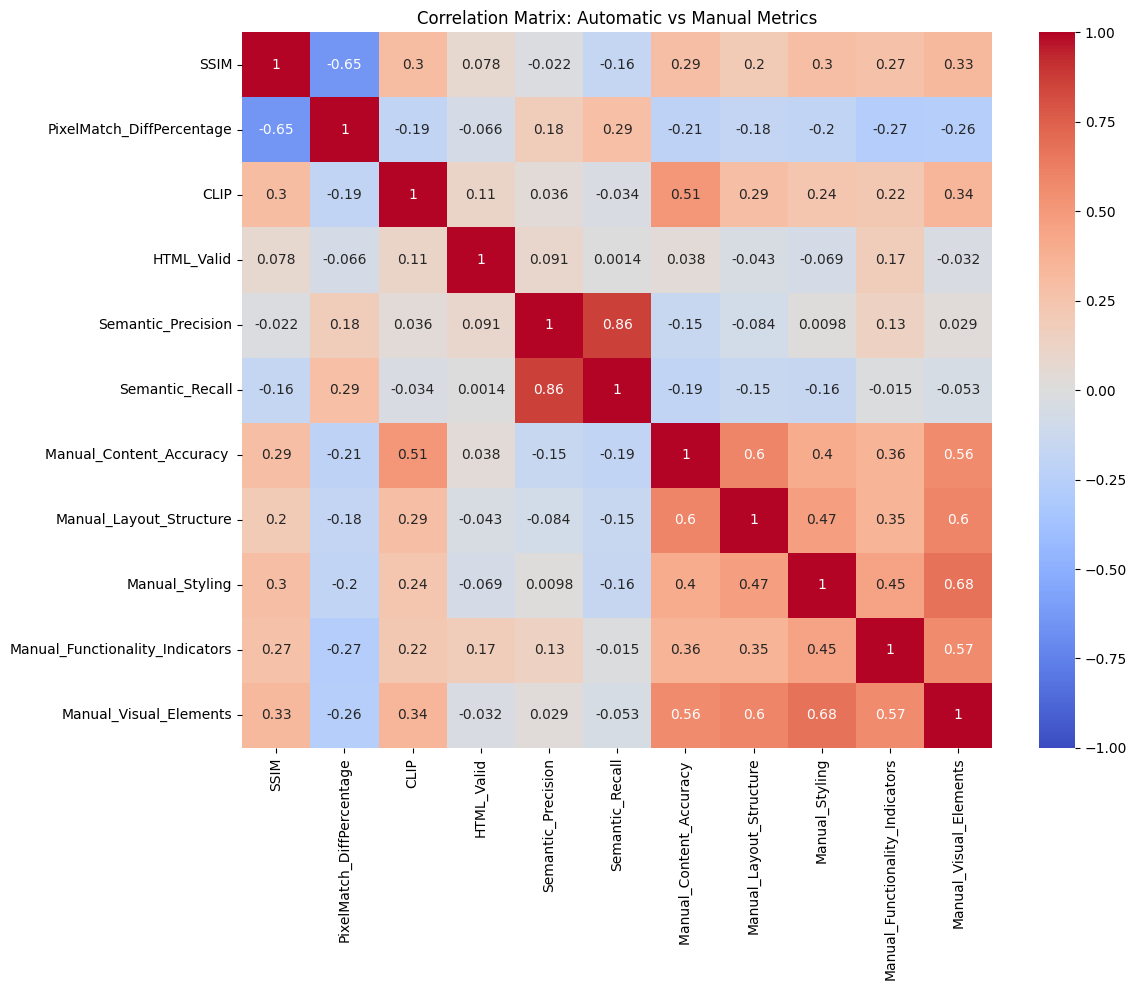

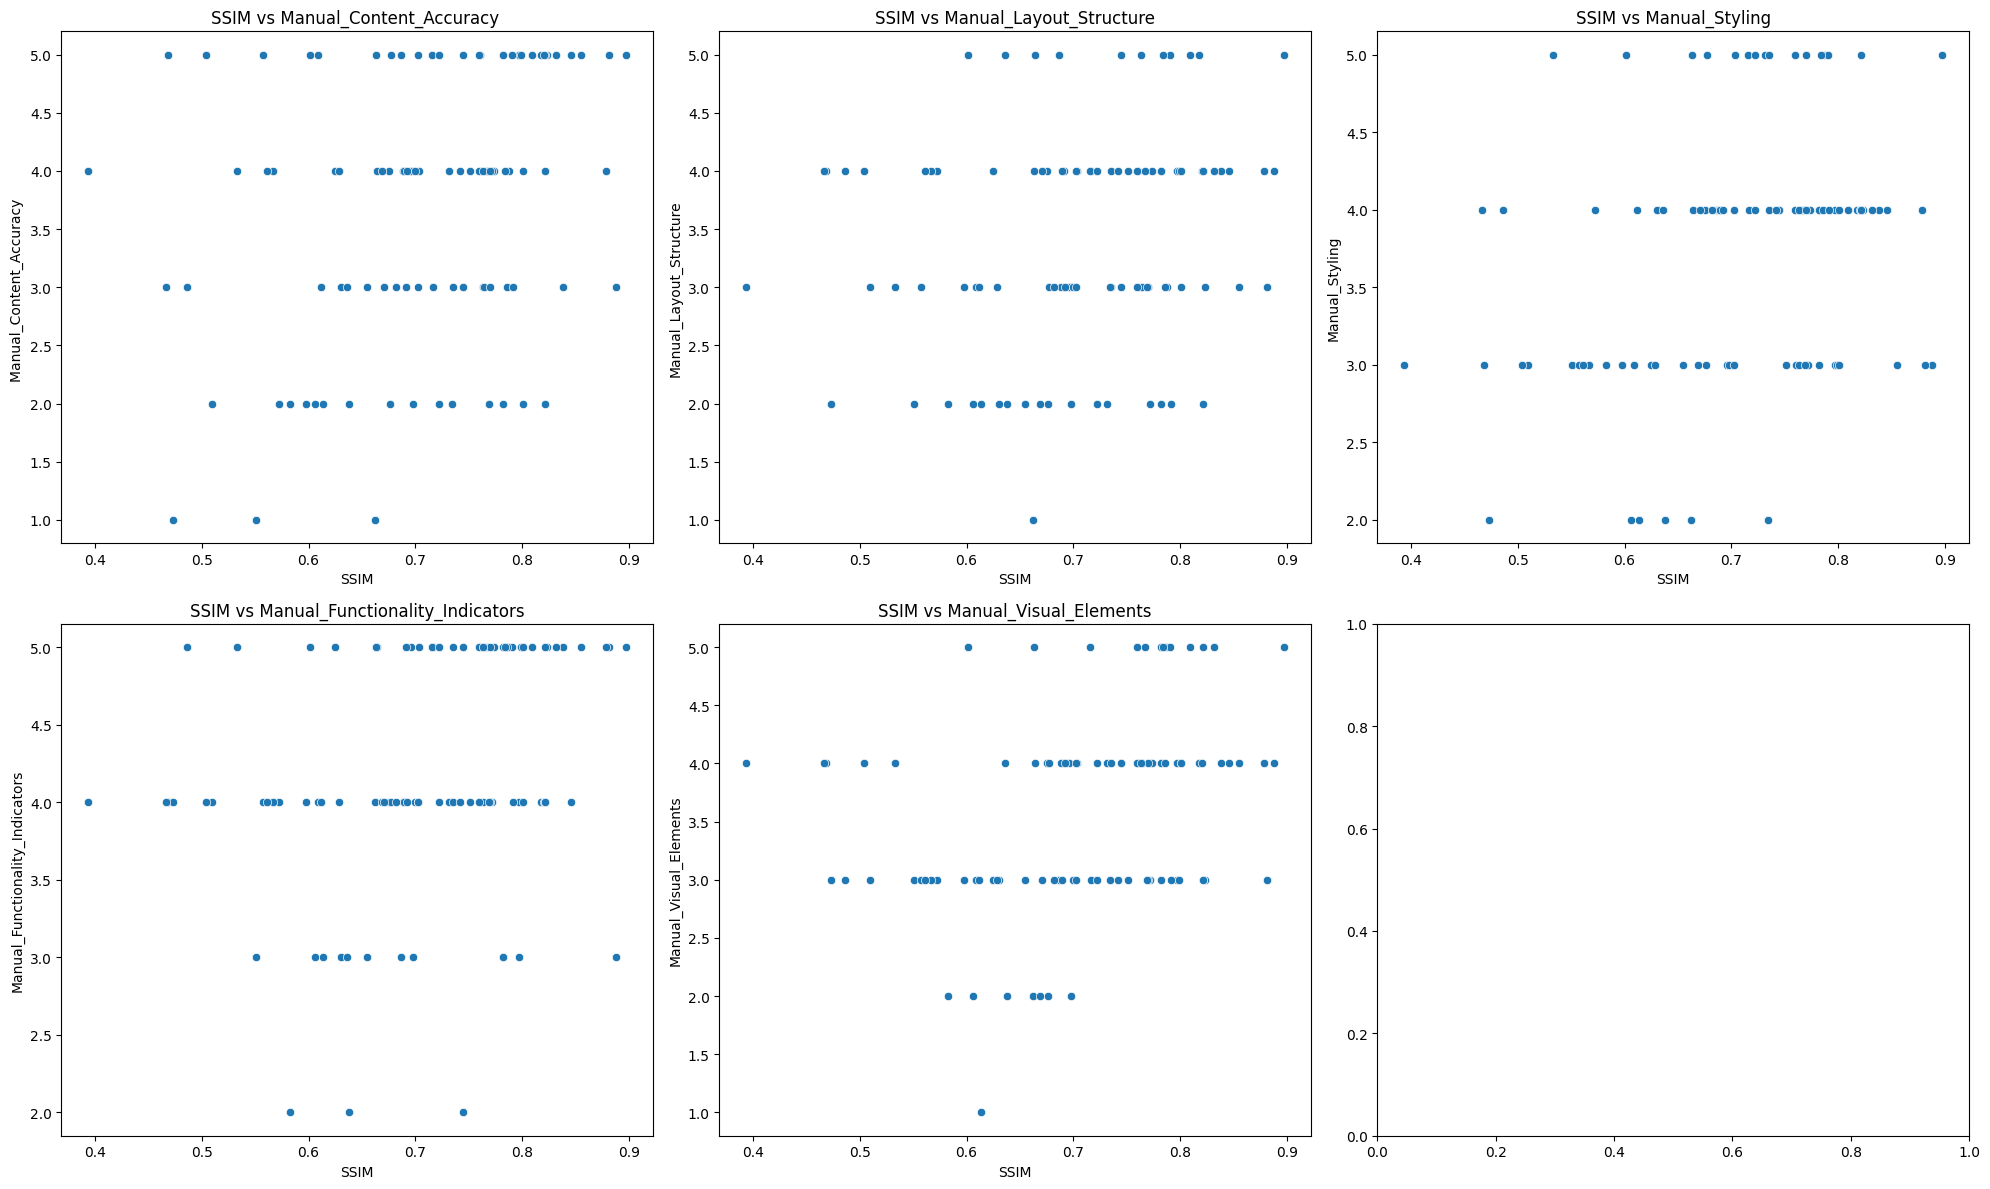

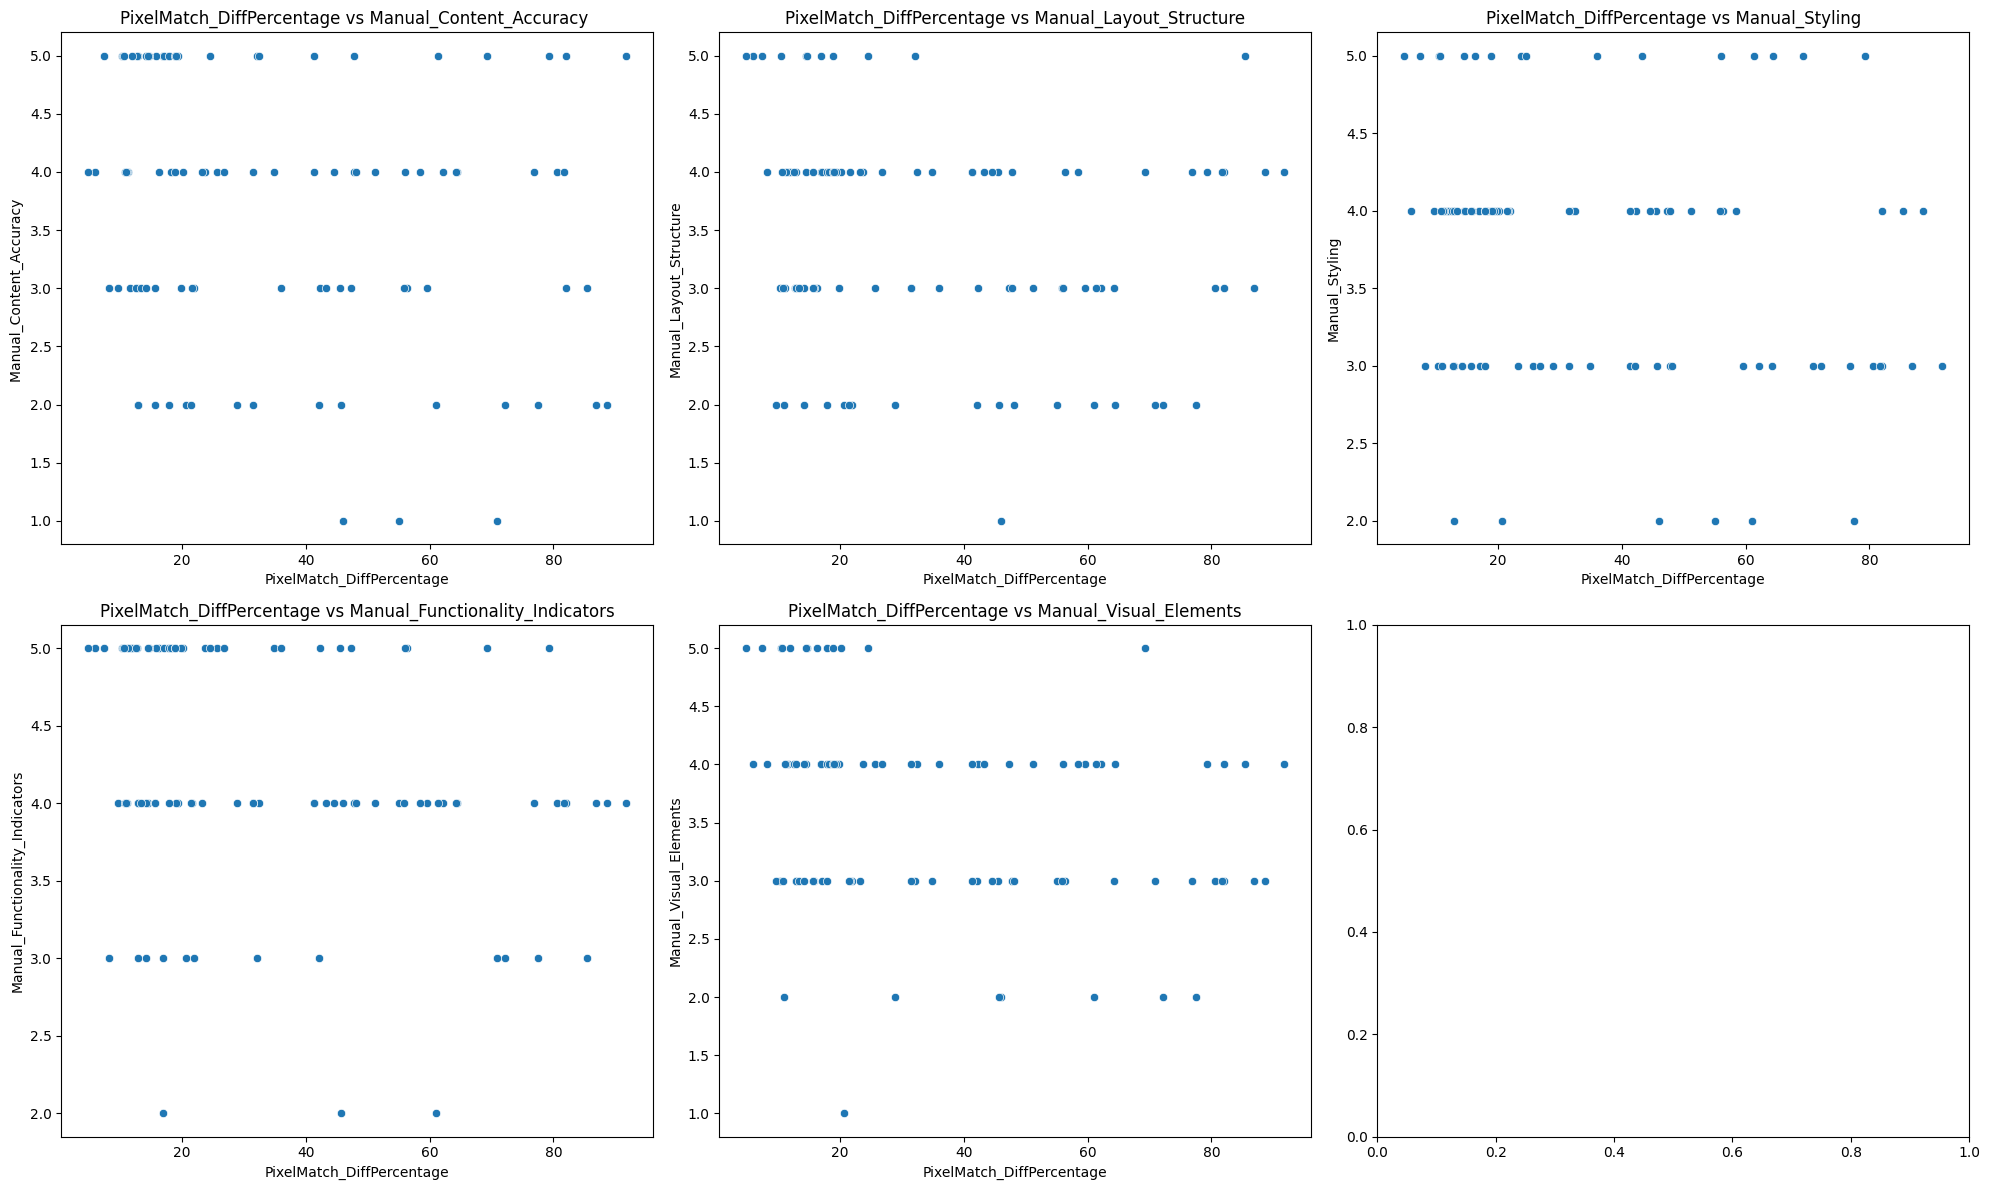

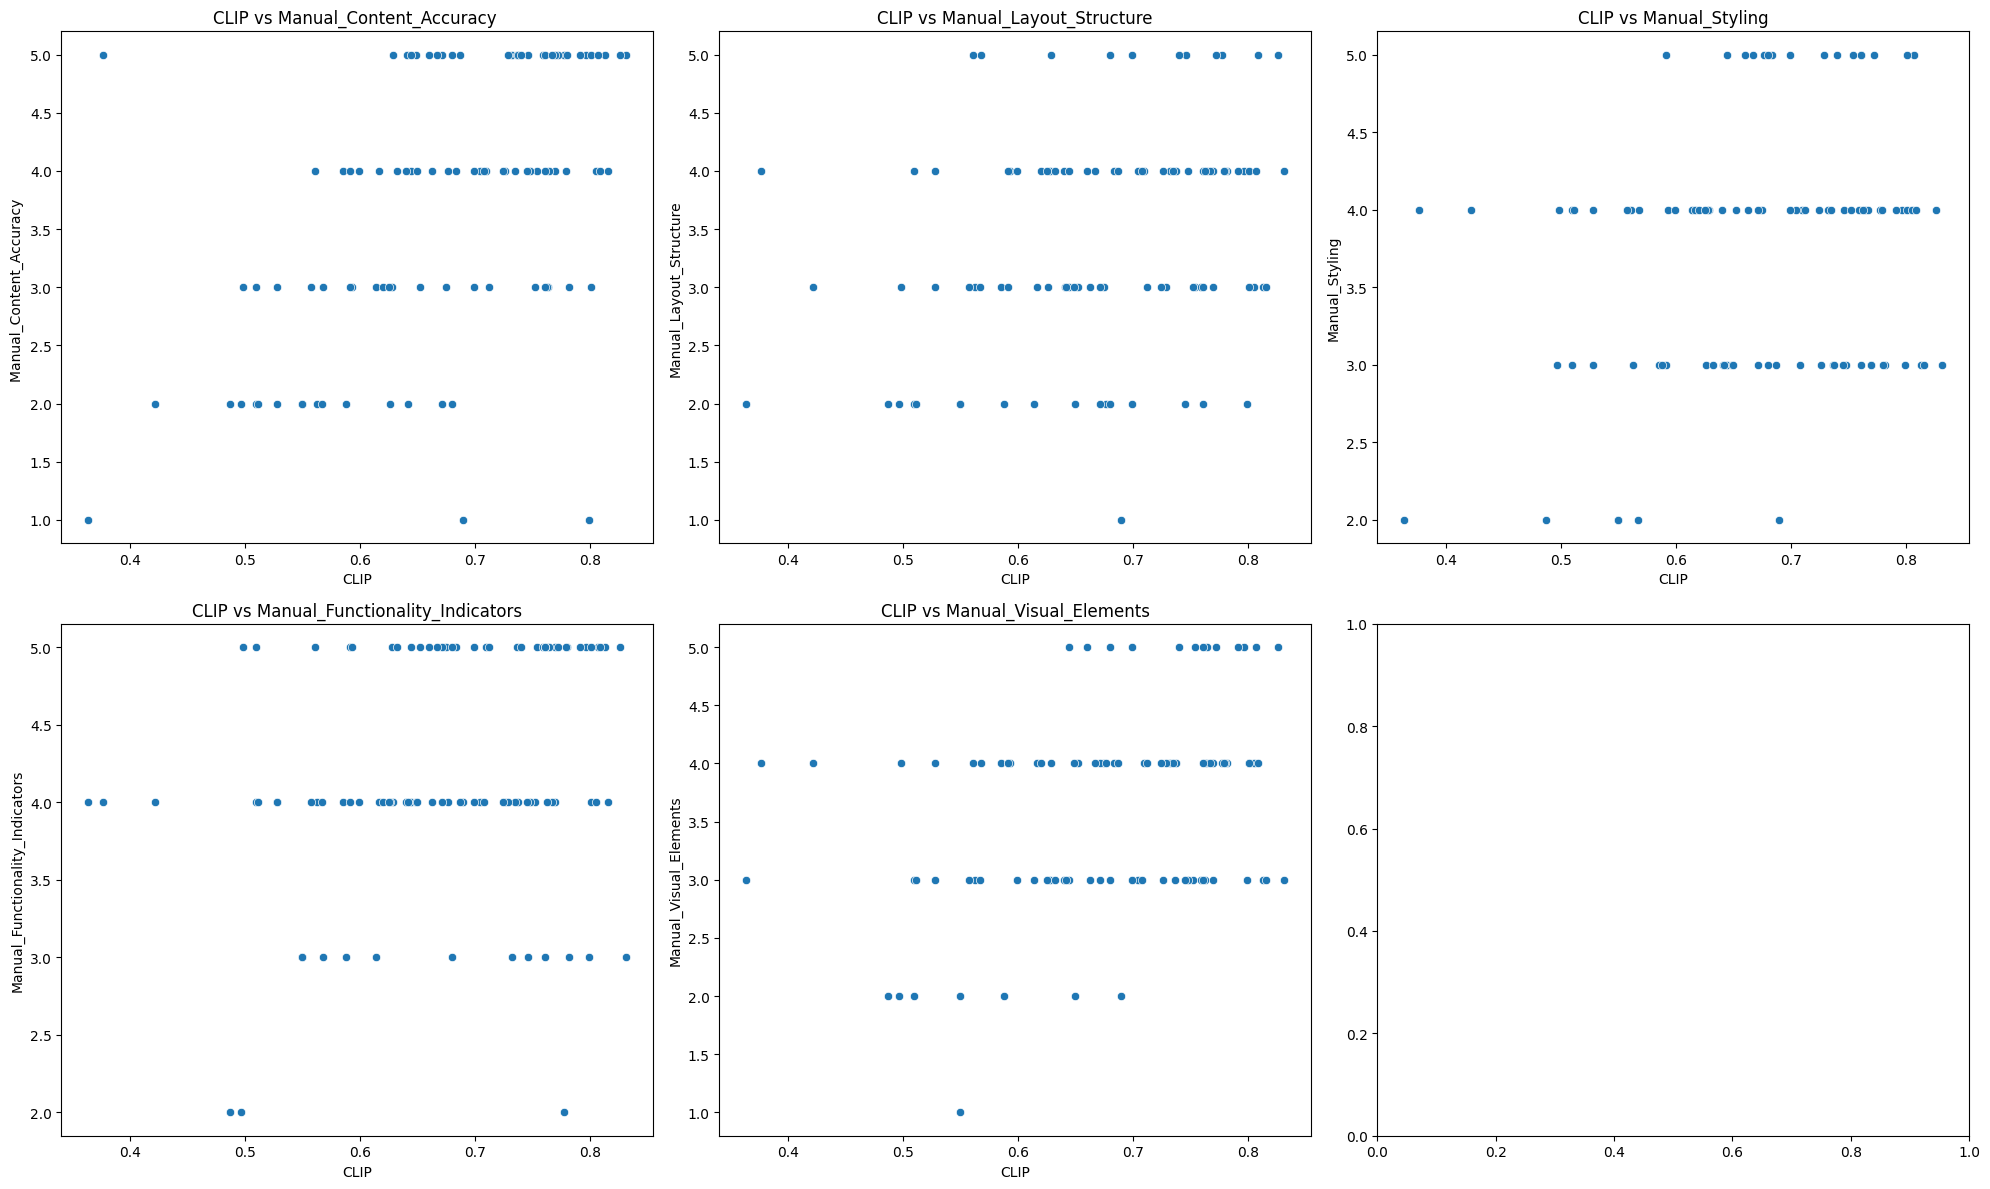

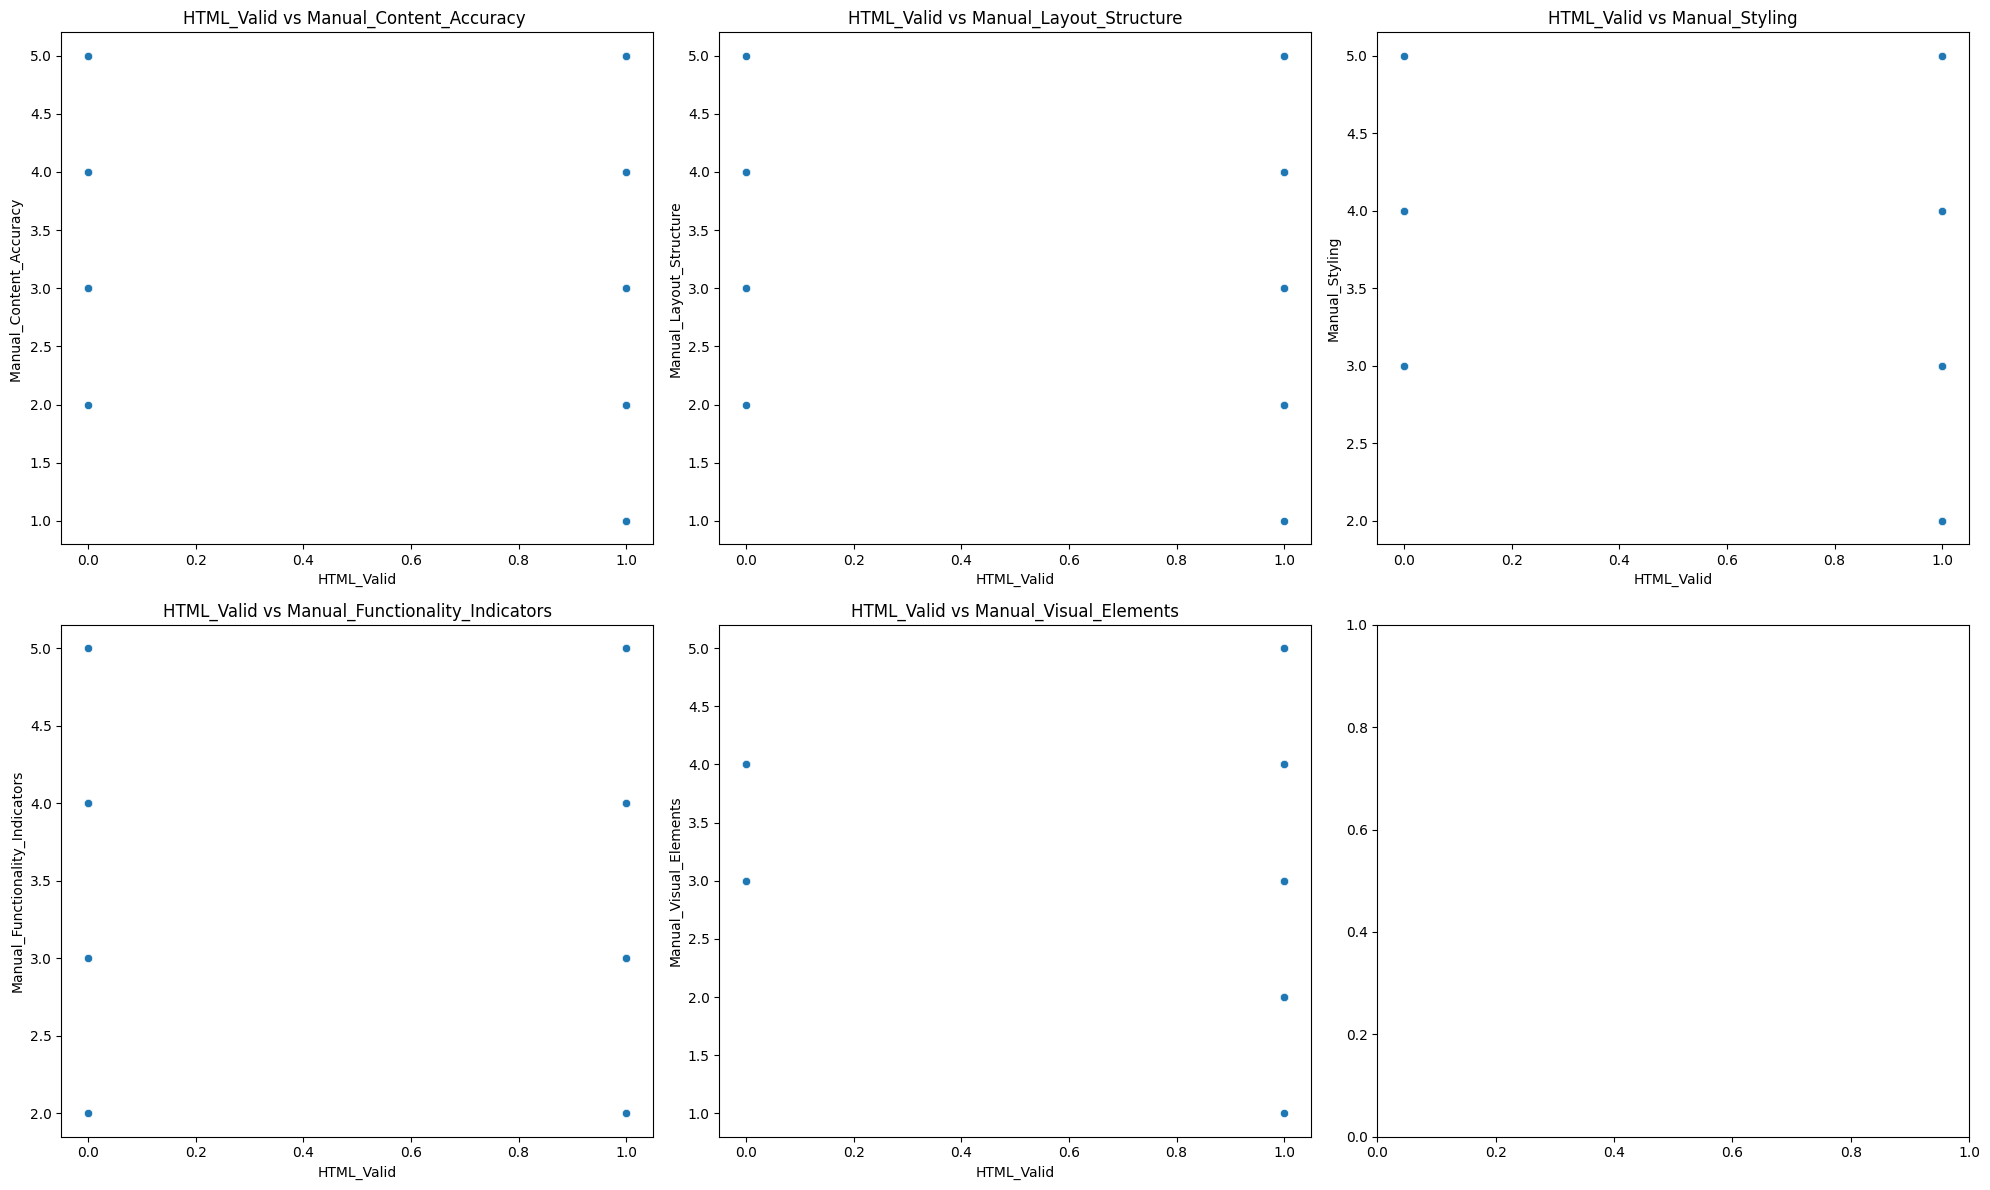

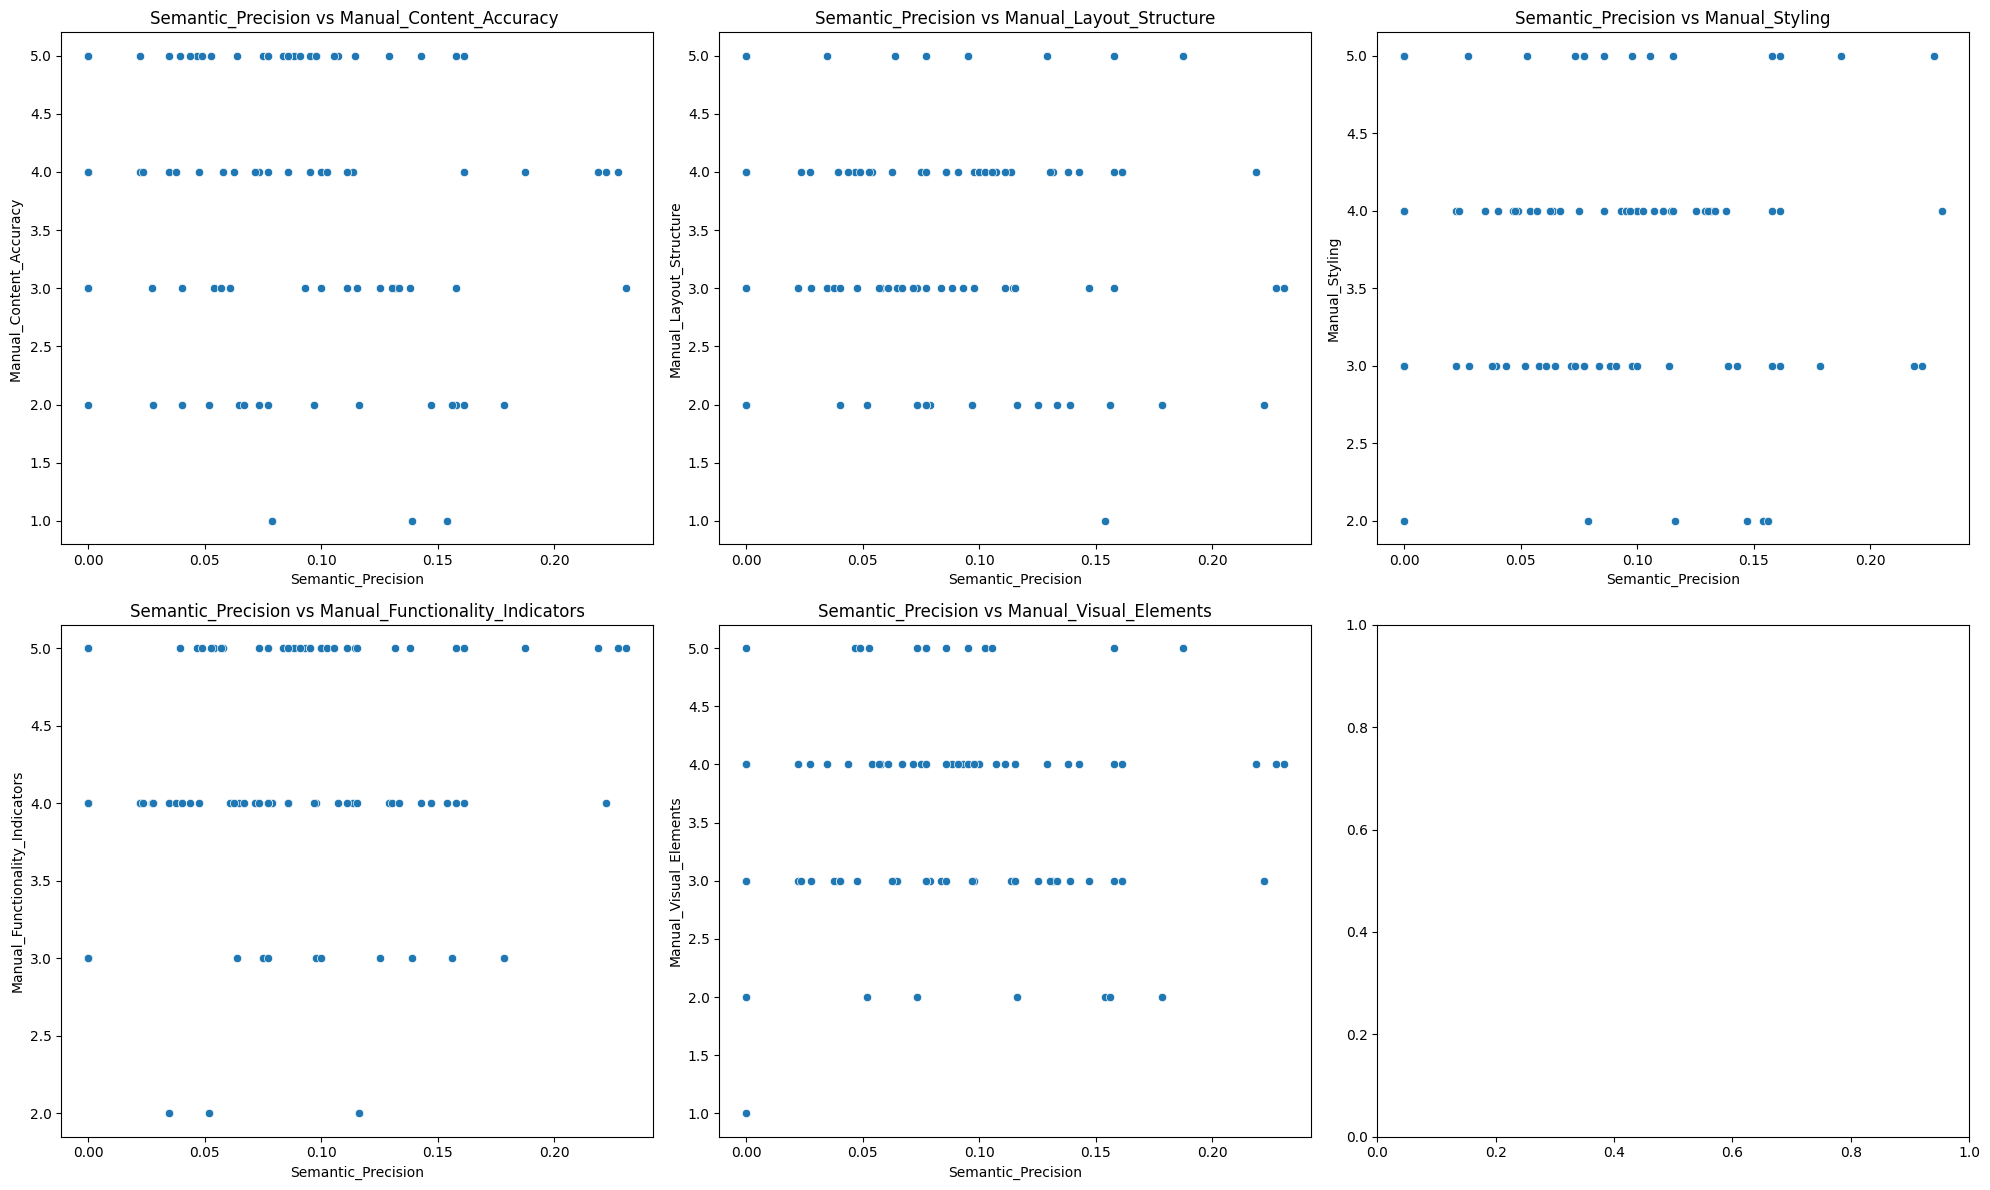

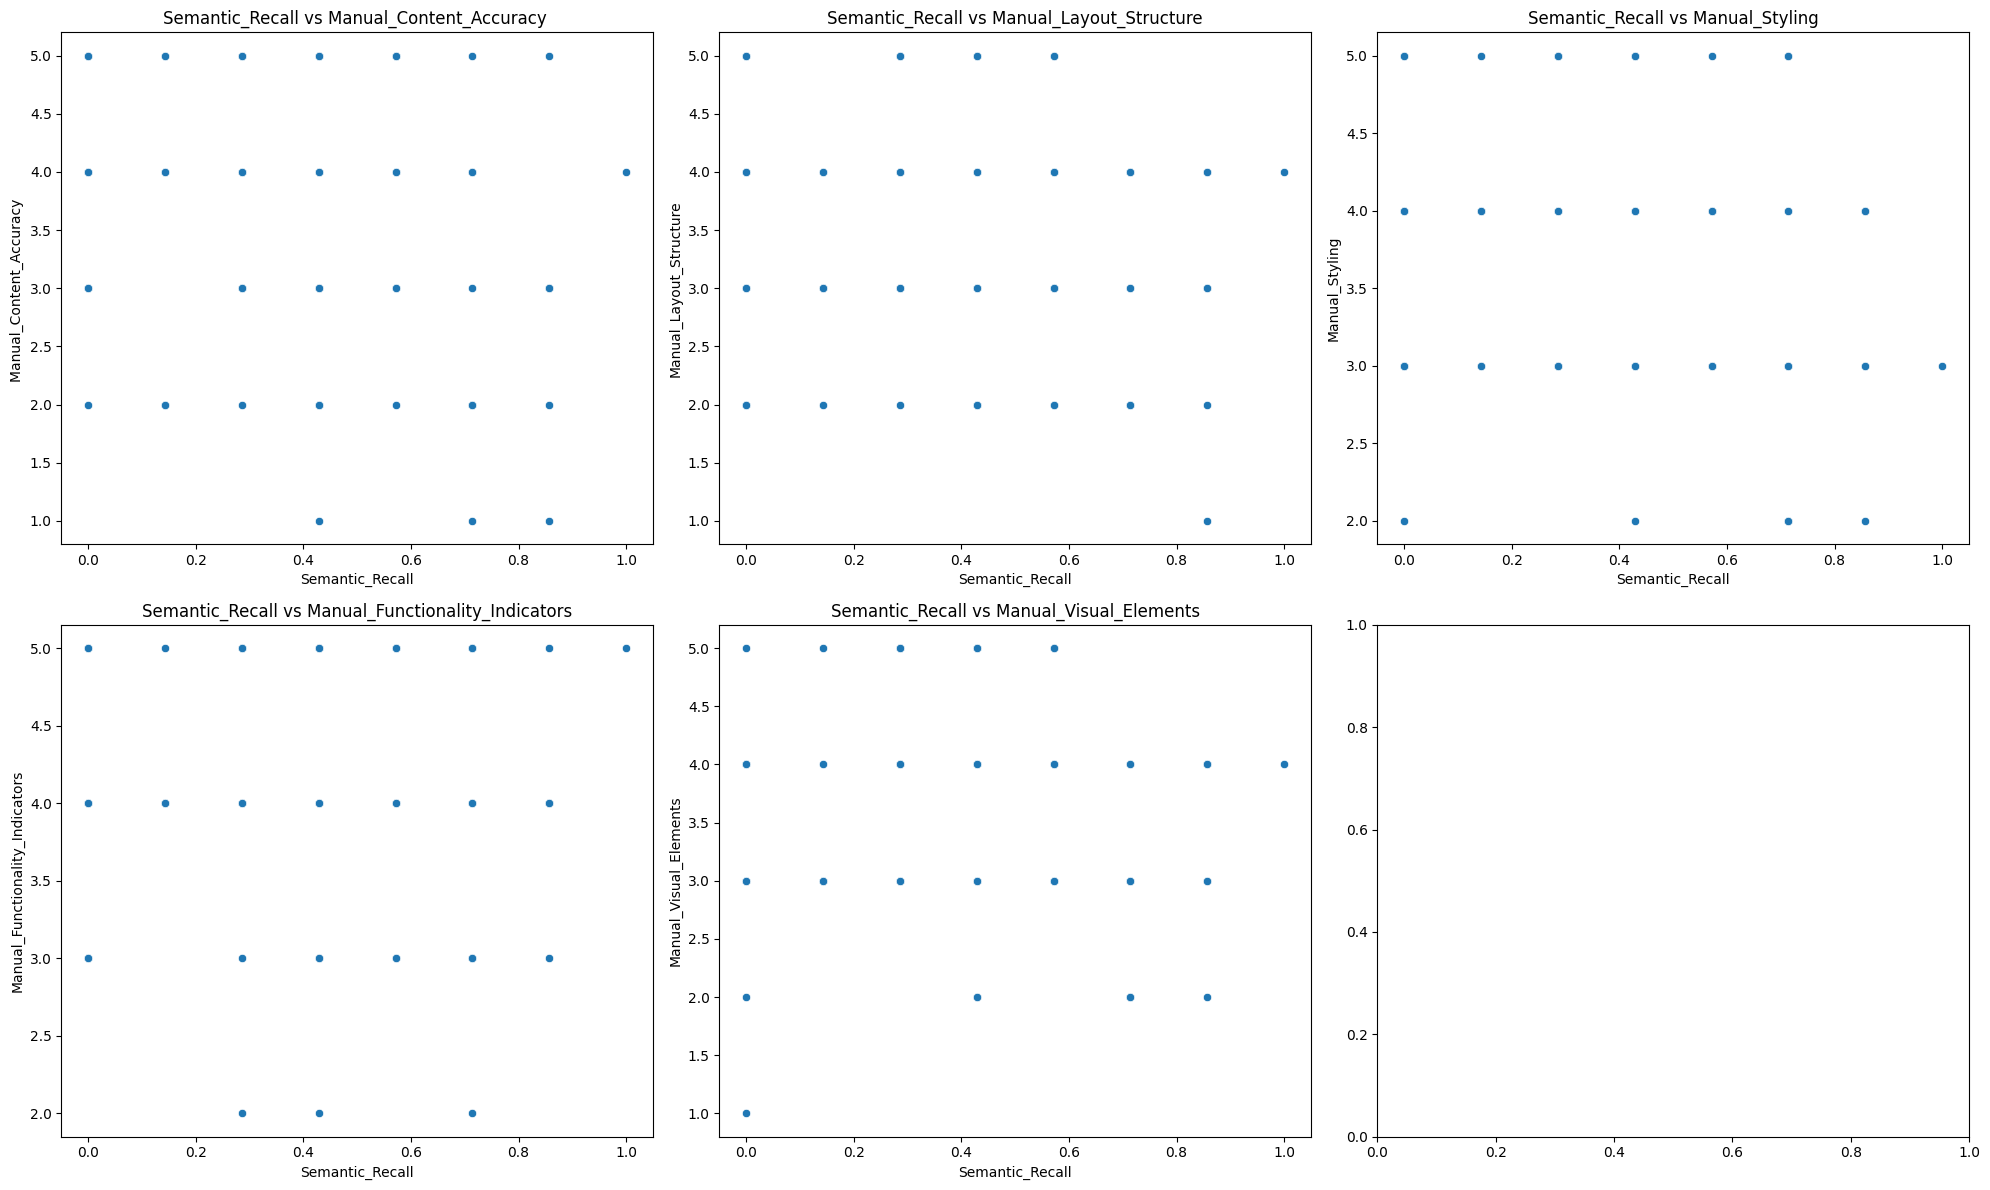


T-tests between automatic and manual metrics:
SSIM vs Manual_Content_Accuracy : t-statistic = -25.5510, p-value = 0.0000
SSIM vs Manual_Layout_Structure: t-statistic = -28.4342, p-value = 0.0000
SSIM vs Manual_Styling: t-statistic = -36.3431, p-value = 0.0000
SSIM vs Manual_Functionality_Indicators: t-statistic = -44.4847, p-value = 0.0000
SSIM vs Manual_Visual_Elements: t-statistic = -33.2775, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Content_Accuracy : t-statistic = 12.6846, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Layout_Structure: t-statistic = 12.7959, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Styling: t-statistic = 12.6834, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Functionality_Indicators: t-statistic = 12.4911, p-value = 0.0000
PixelMatch_DiffPercentage vs Manual_Visual_Elements: t-statistic = 12.7361, p-value = 0.0000
CLIP vs Manual_Content_Accuracy : t-statistic = -25.8438, p-value = 0.0000
CLIP vs Manual_Layout_Structure: t-stati

In [ ]:

correlation_matrix = data[auto_metrics + manual_metrics].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Automatic vs Manual Metrics')
plt.tight_layout()
plt.show()

#  Scatter plots for each automatic metric vs manual metrics
for auto in auto_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    for i, manual in enumerate(manual_metrics):
        sns.scatterplot(data=data, x=auto, y=manual, ax=axes[i])
        axes[i].set_title(f'{auto} vs {manual}')
    plt.tight_layout()
    plt.show()

# T-tests between automatic and manual metrics
print("\nT-tests between automatic and manual metrics:")
for auto in auto_metrics:
    for manual in manual_metrics:
        t_stat, p_value = stats.ttest_ind(data[auto], data[manual])
        print(f"{auto} vs {manual}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


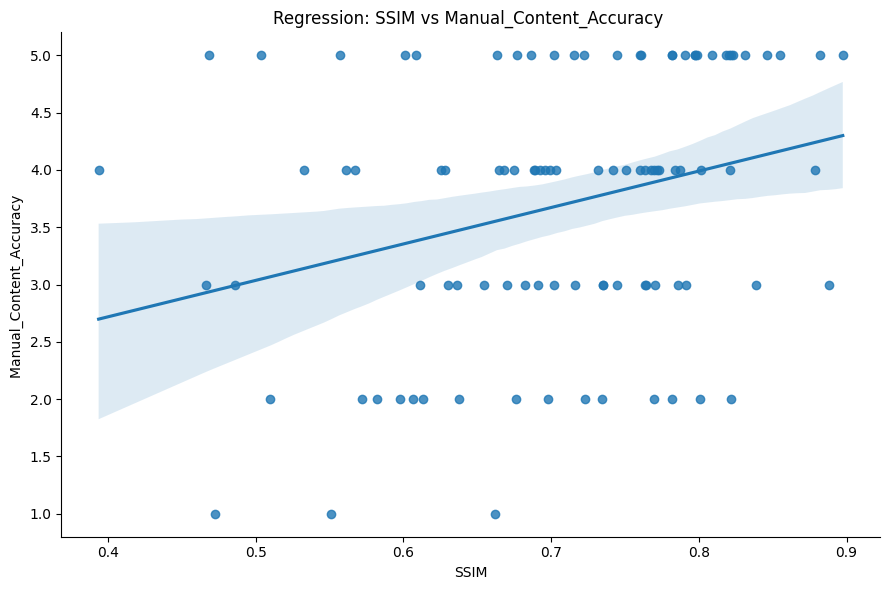

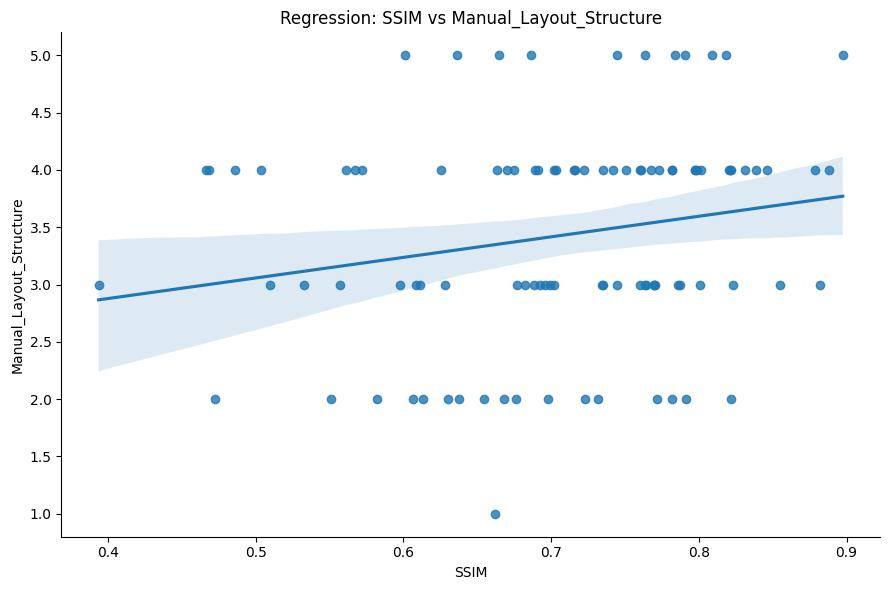

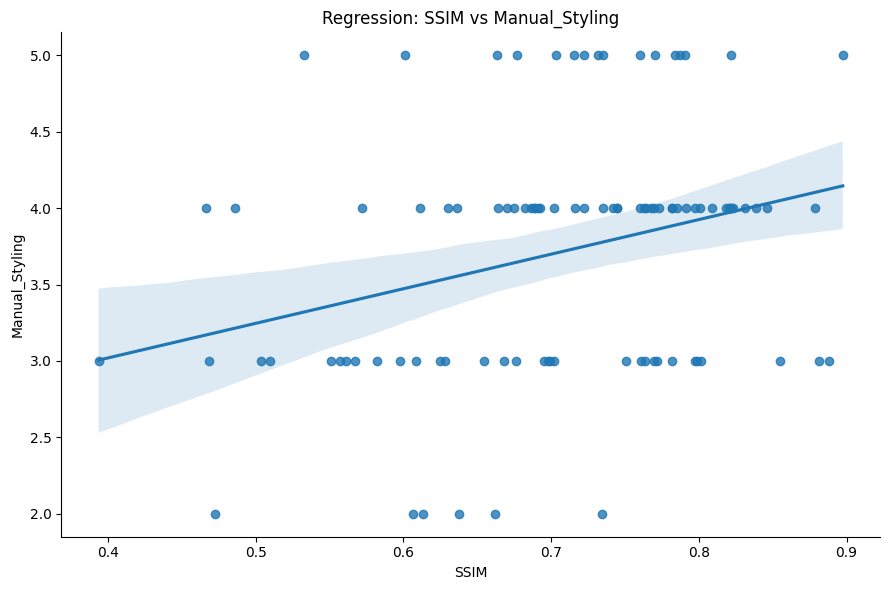

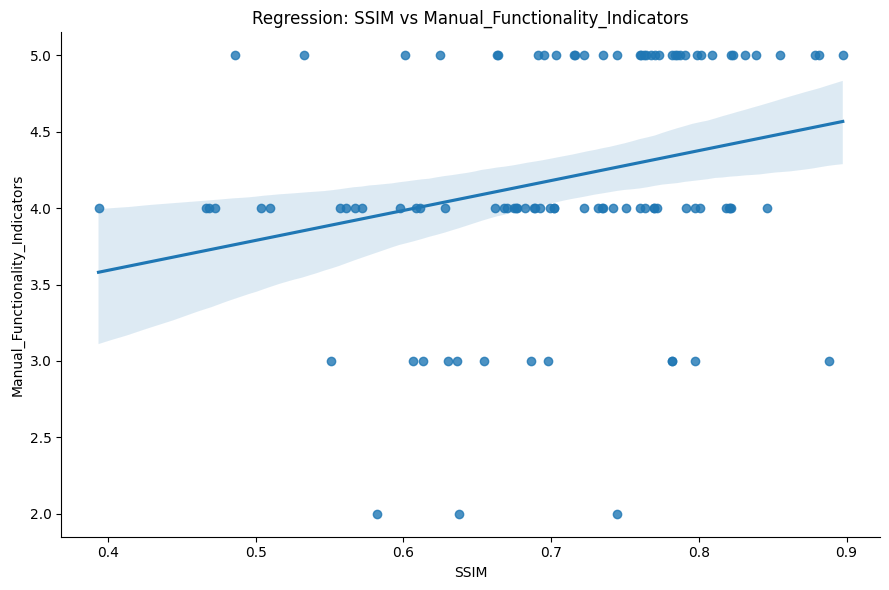

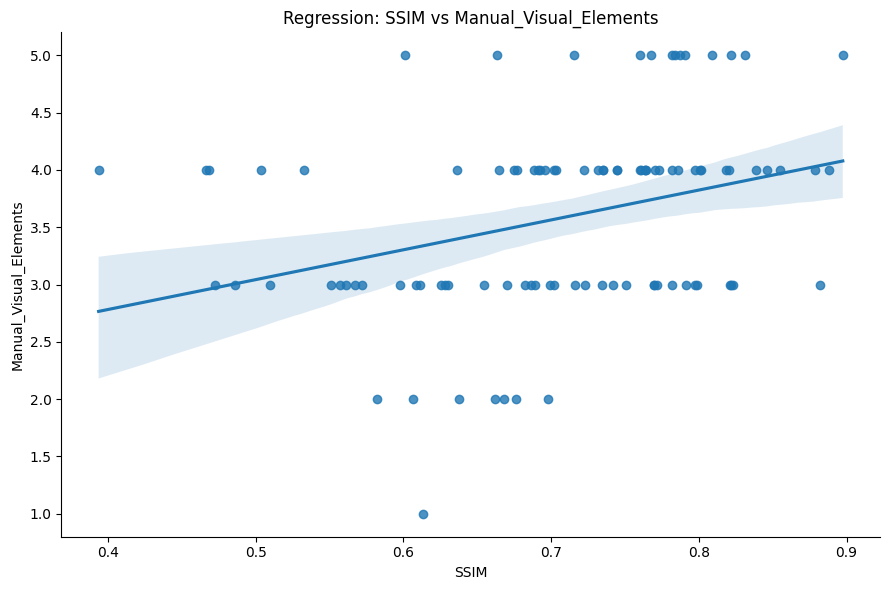

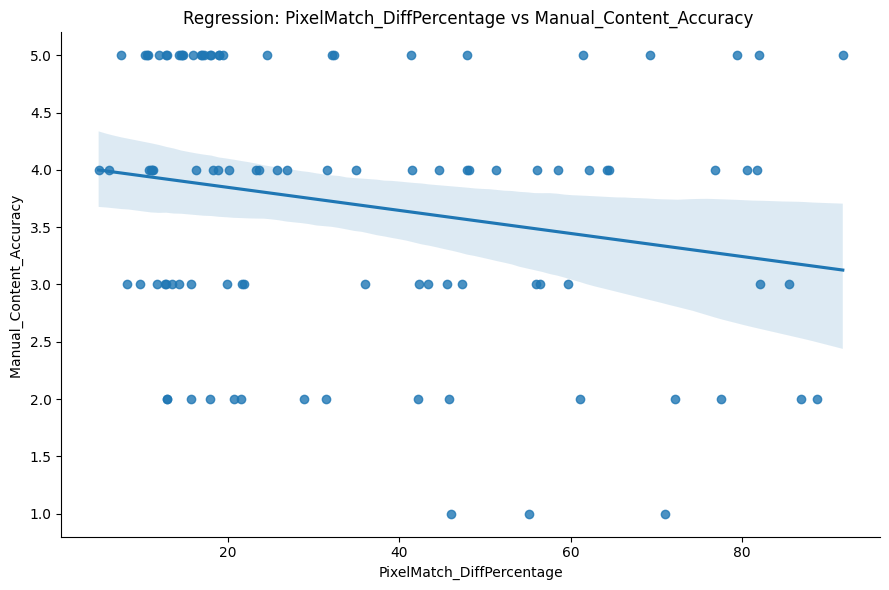

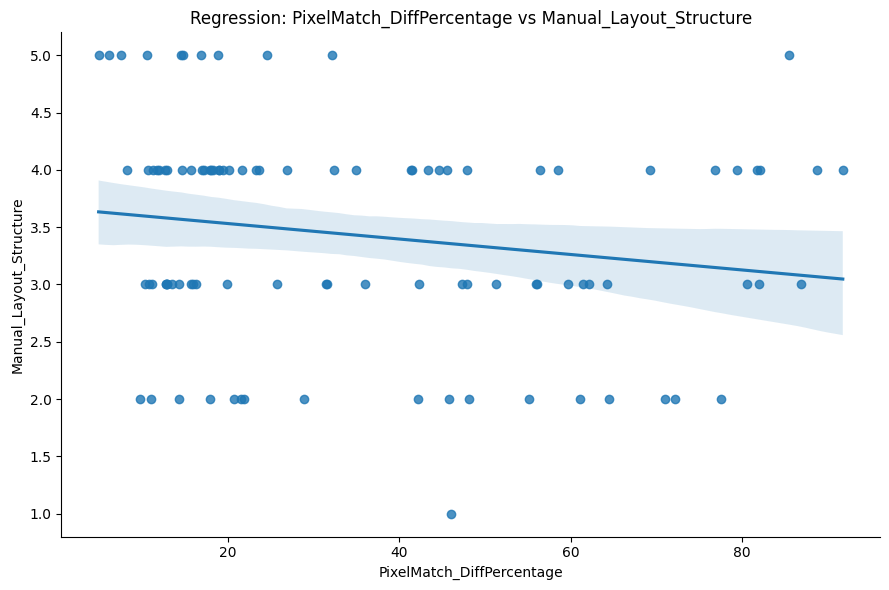

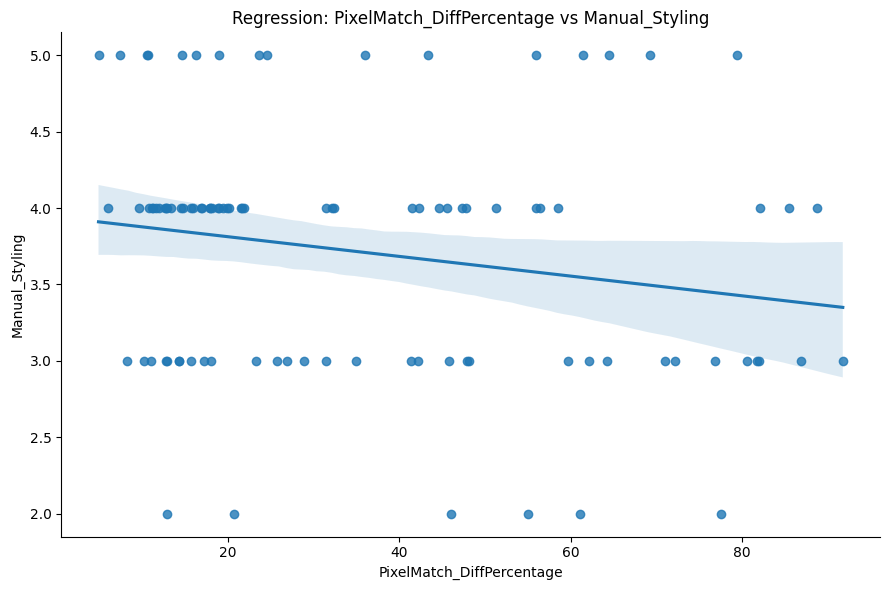

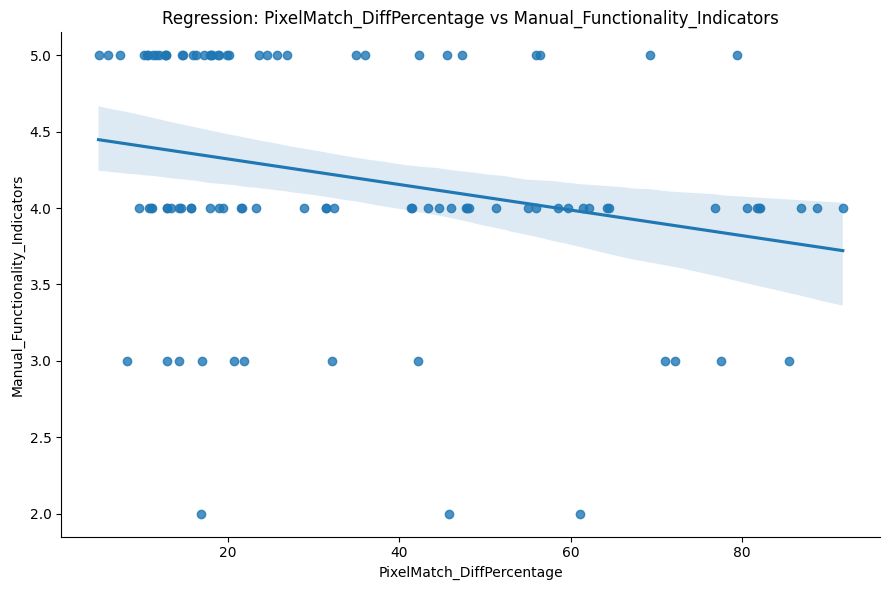

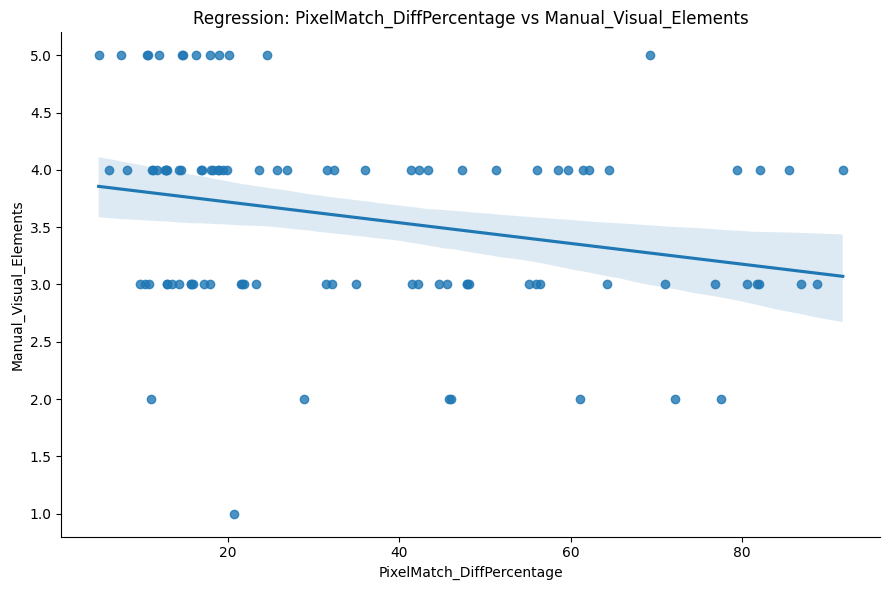

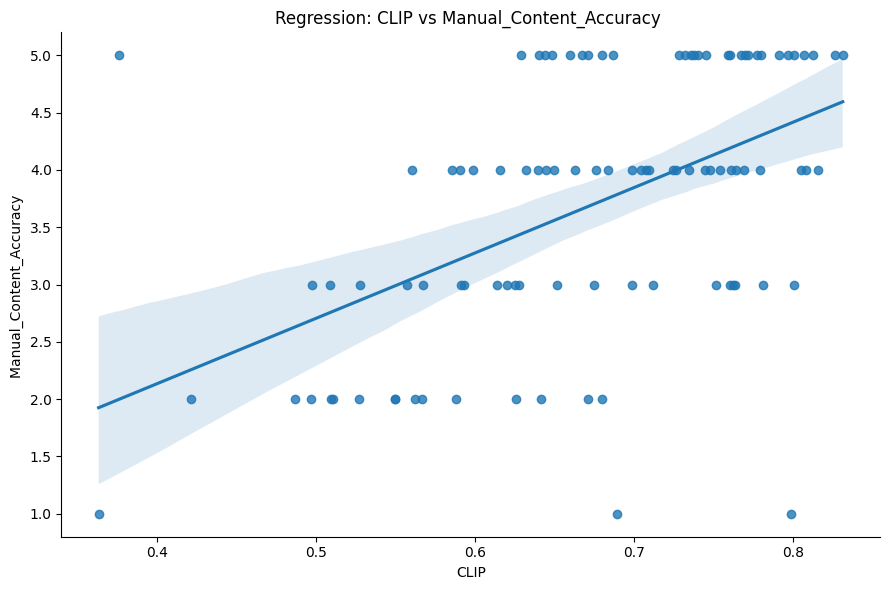

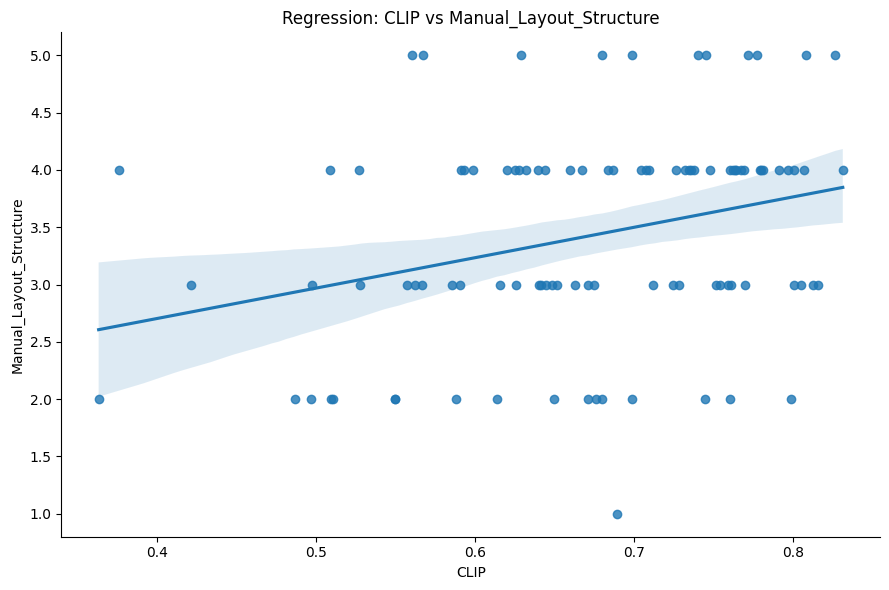

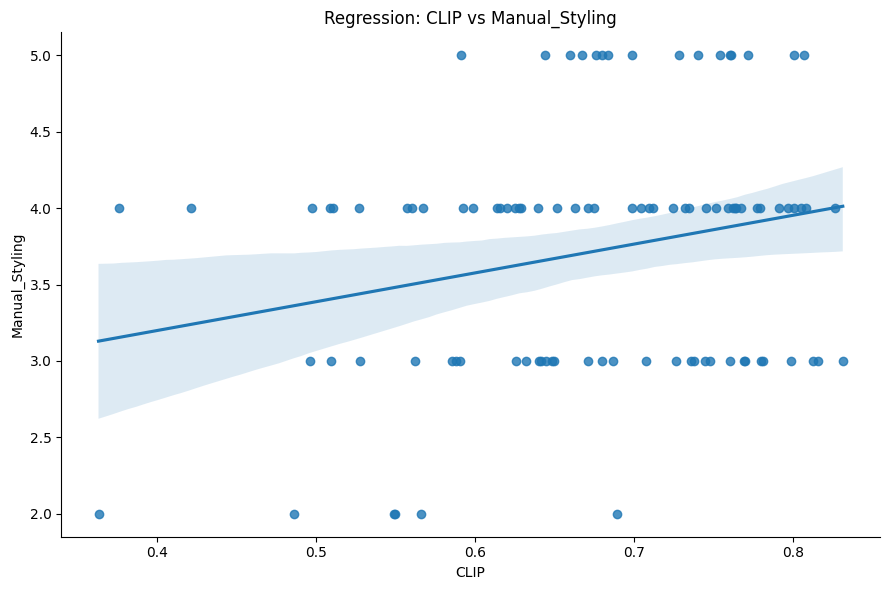

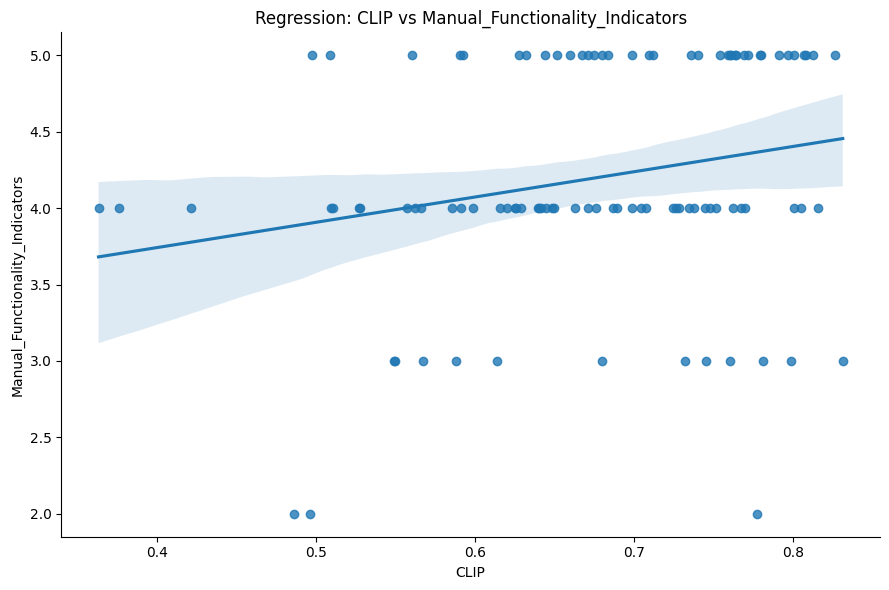

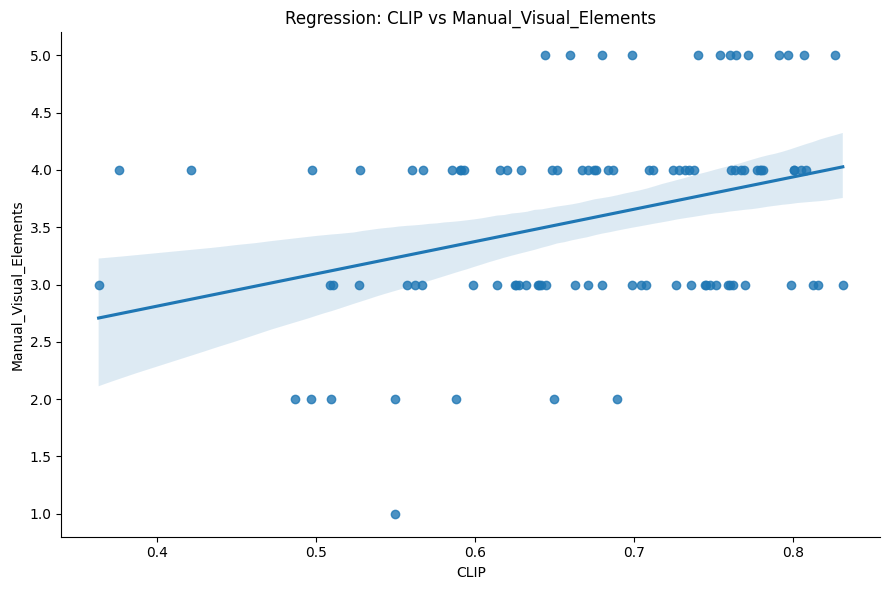

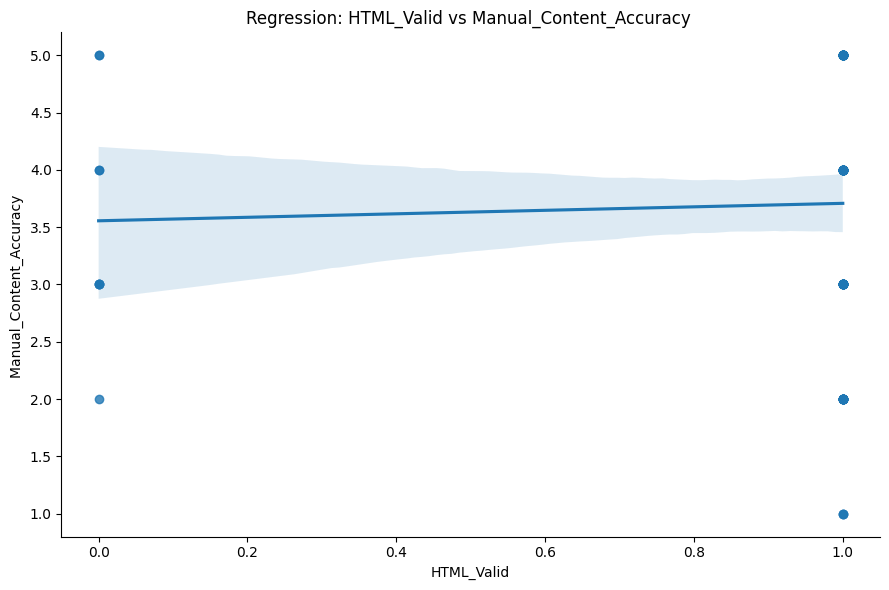

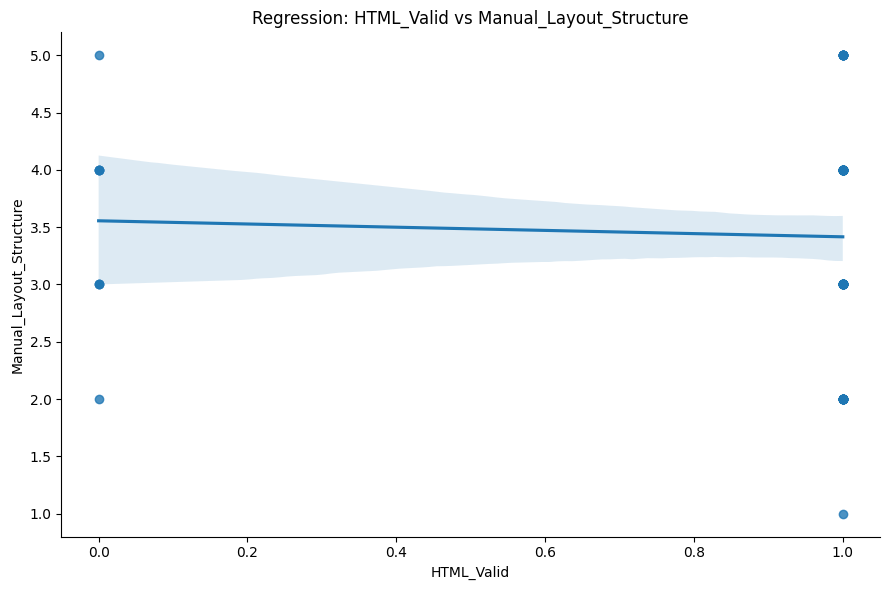

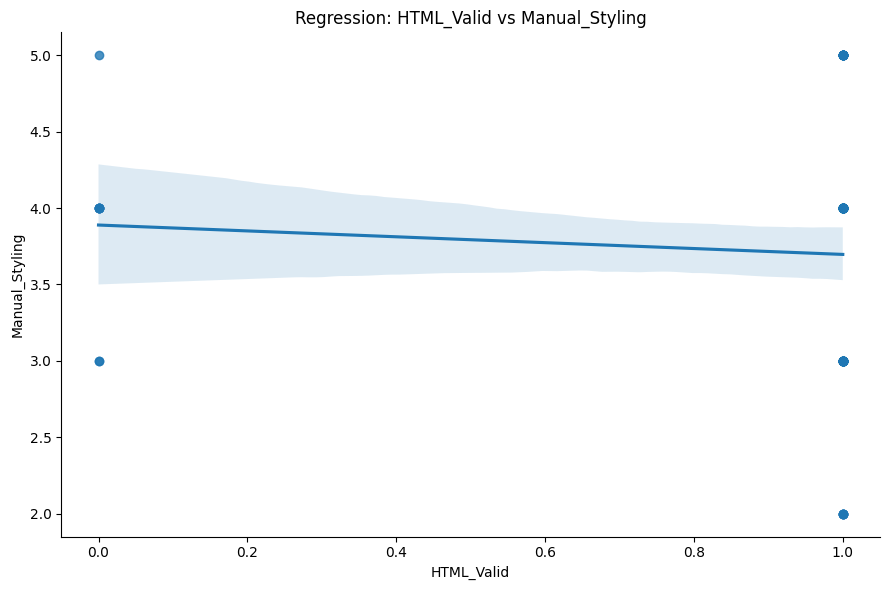

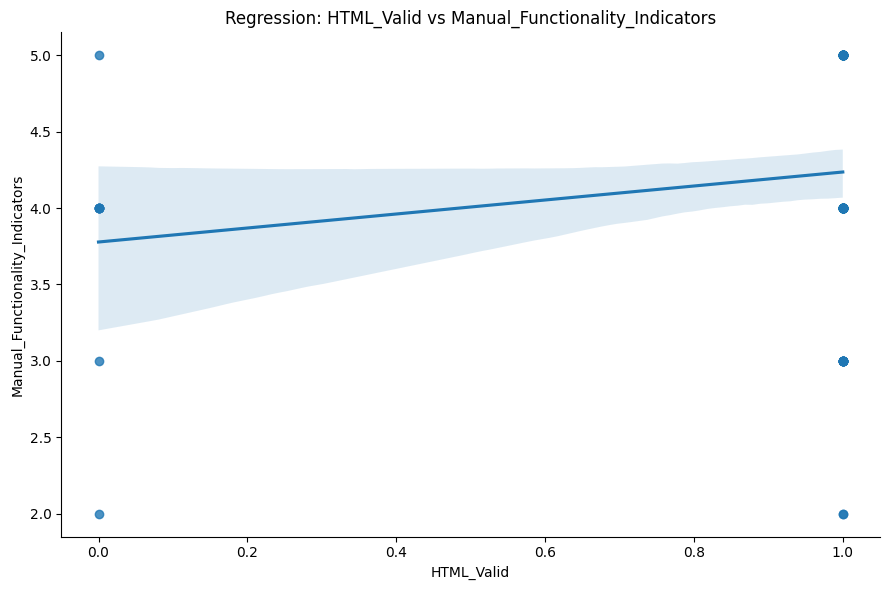

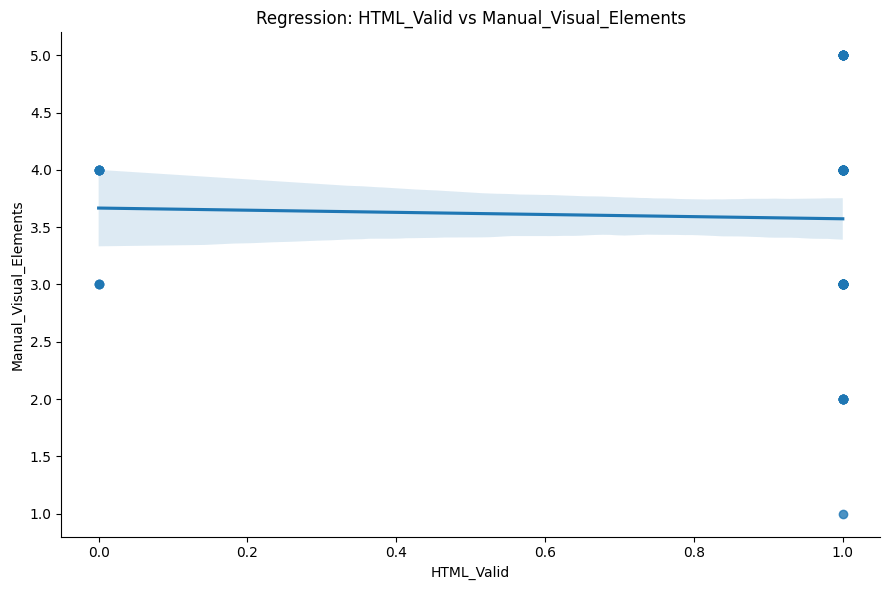

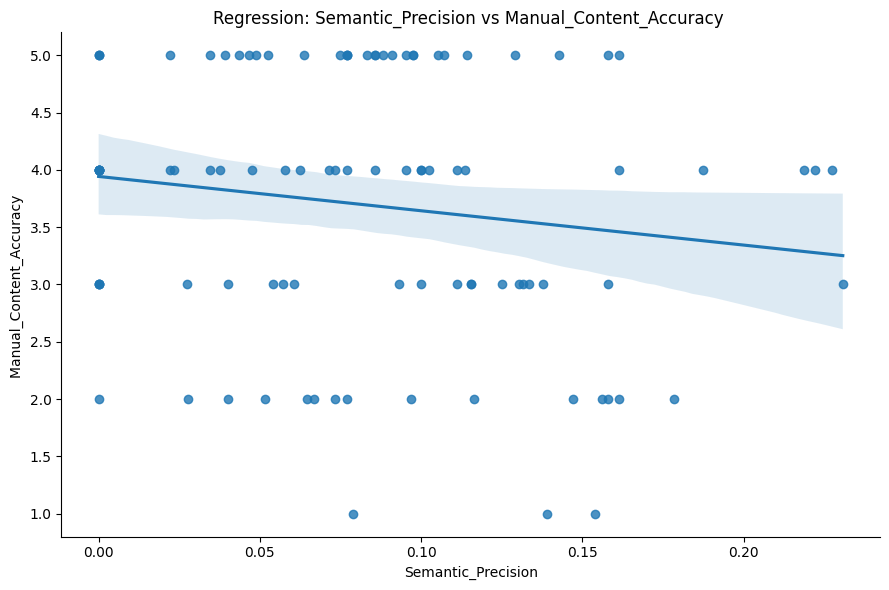

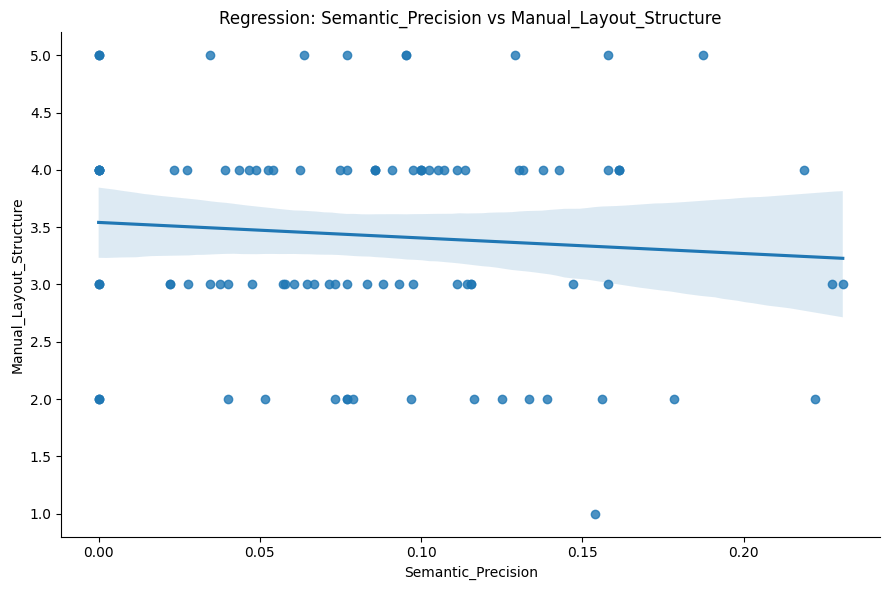

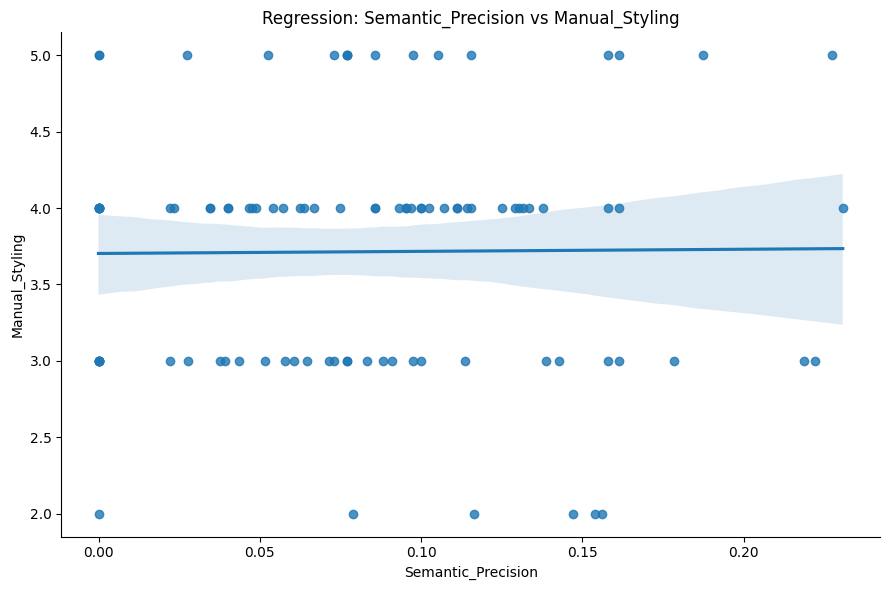

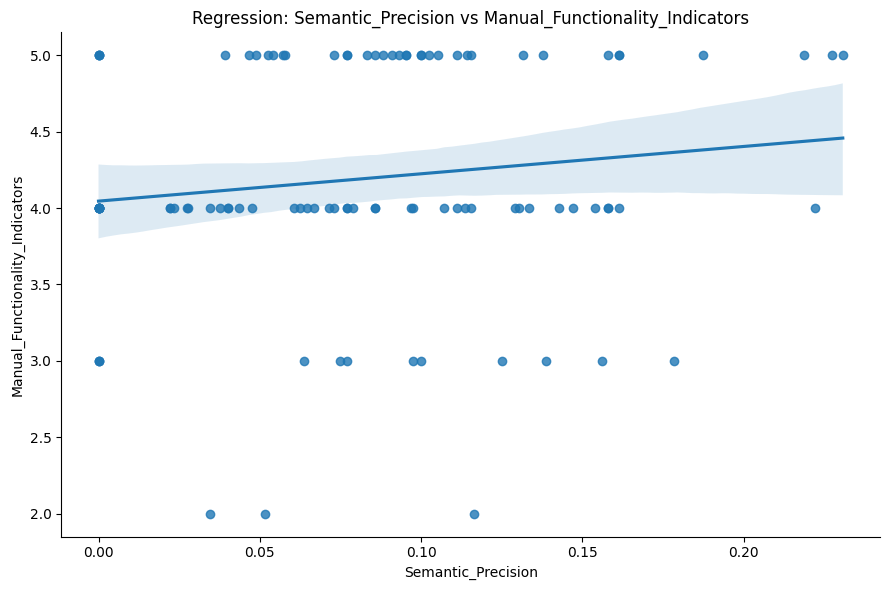

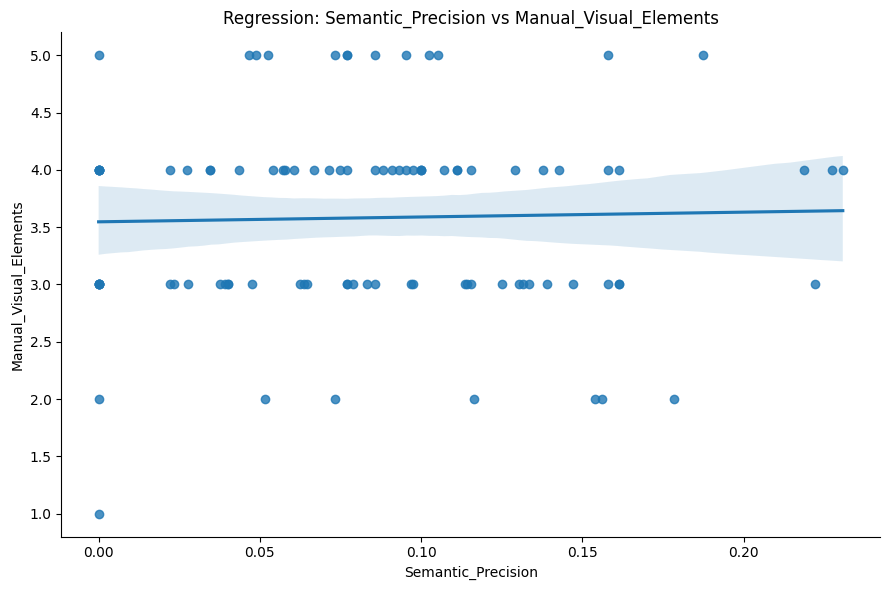

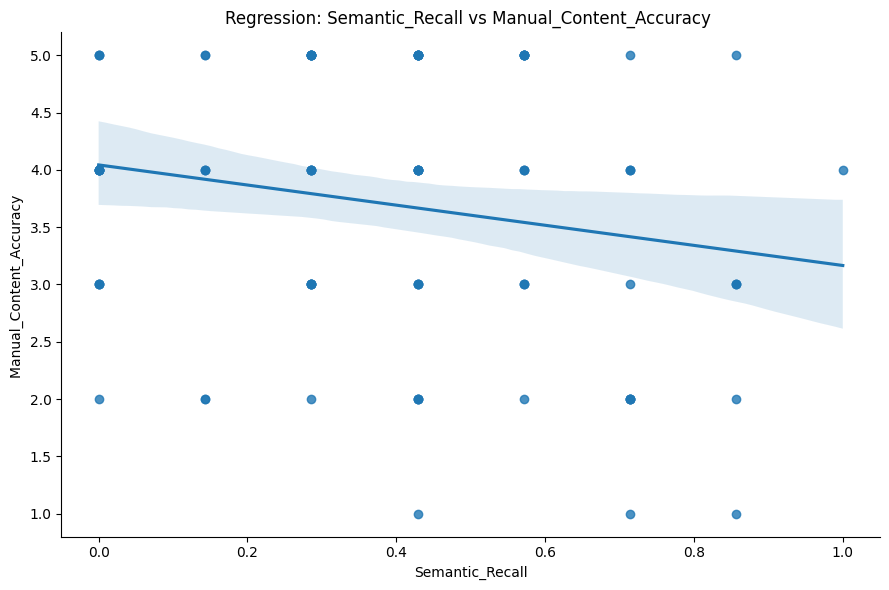

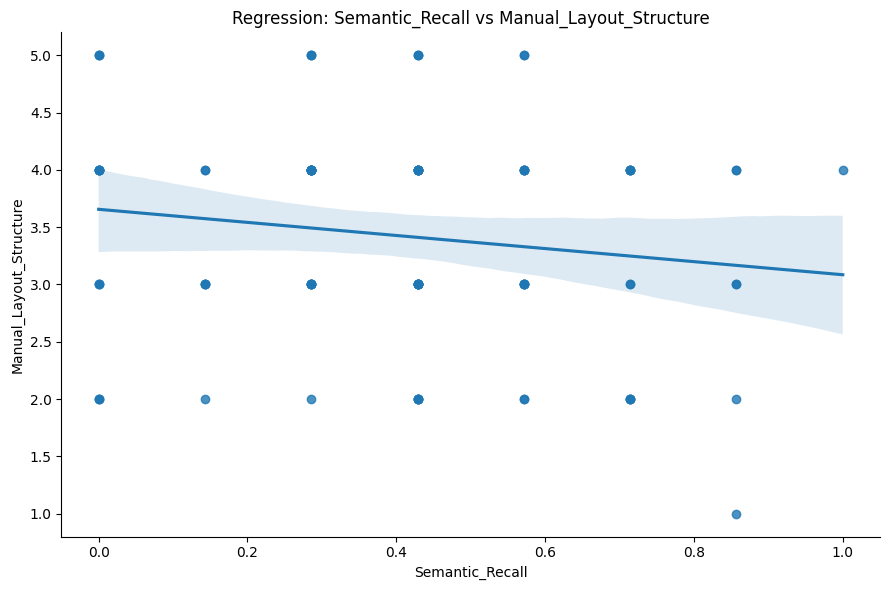

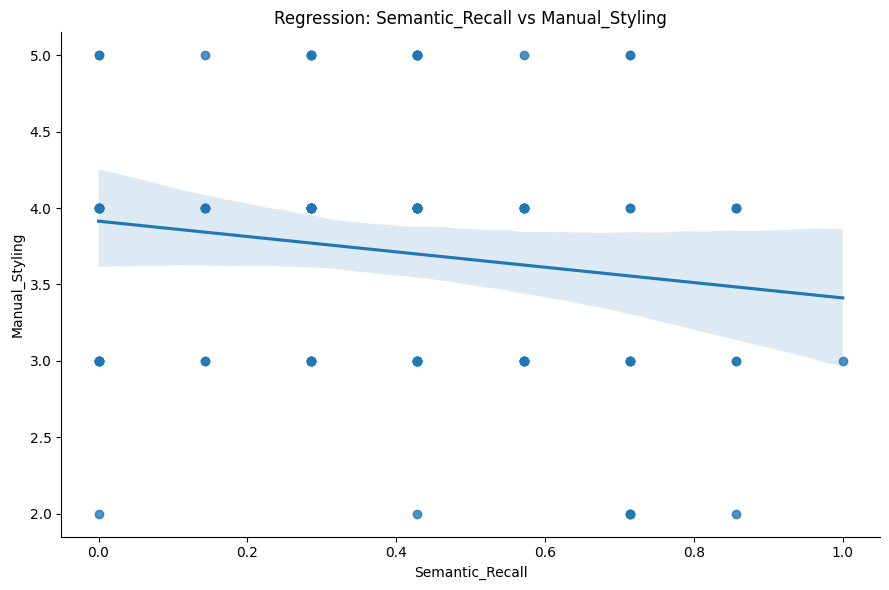

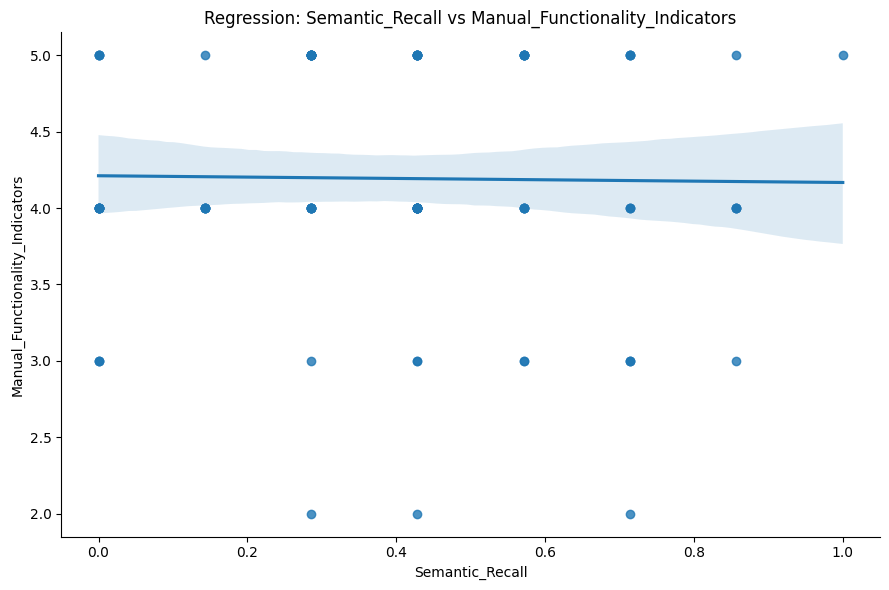

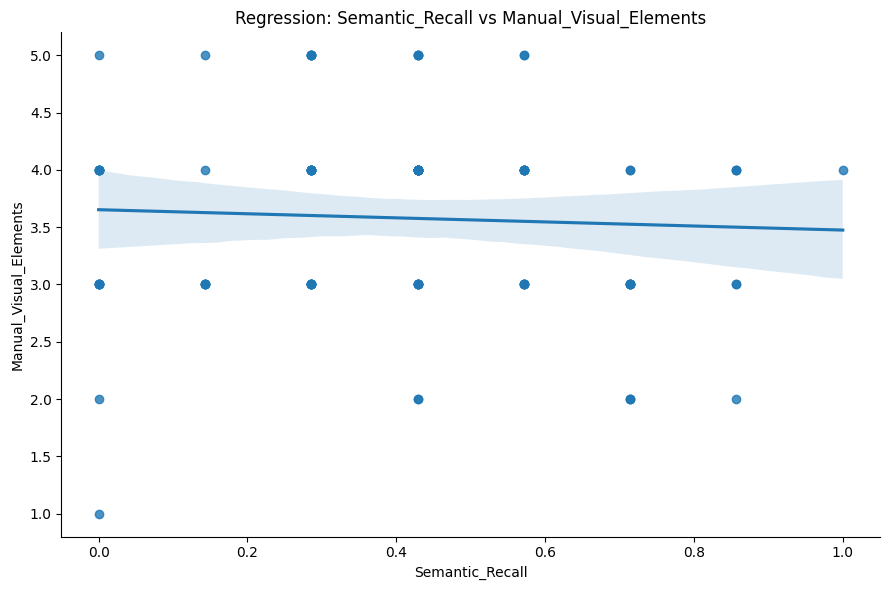

In [ ]:
for auto in auto_metrics:
    for manual in manual_metrics:
        sns.lmplot(x=auto, y=manual, data=data, height=6, aspect=1.5)
        plt.title(f'Regression: {auto} vs {manual}')
        plt.tight_layout()
        plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("\nMAE and RMSE between automatic and manual metrics:")
for auto in auto_metrics:
    for manual in manual_metrics:
        mae = mean_absolute_error(data[manual], data[auto])
        rmse = mean_squared_error(data[manual], data[auto], squared=False)
        print(f"{auto} vs {manual}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")



MAE and RMSE between automatic and manual metrics:
SSIM vs Manual_Content_Accuracy : MAE = 2.9869, RMSE = 3.1901
SSIM vs Manual_Layout_Structure: MAE = 2.7216, RMSE = 2.8733
SSIM vs Manual_Styling: MAE = 3.0073, RMSE = 3.1077
SSIM vs Manual_Functionality_Indicators: MAE = 3.4869, RMSE = 3.5653
SSIM vs Manual_Visual_Elements: MAE = 2.8747, RMSE = 2.9883
PixelMatch_DiffPercentage vs Manual_Content_Accuracy : MAE = 31.5446, RMSE = 40.0873
PixelMatch_DiffPercentage vs Manual_Layout_Structure: MAE = 31.8117, RMSE = 40.2418
PixelMatch_DiffPercentage vs Manual_Styling: MAE = 31.5260, RMSE = 40.0090
PixelMatch_DiffPercentage vs Manual_Functionality_Indicators: MAE = 31.0464, RMSE = 39.6603
PixelMatch_DiffPercentage vs Manual_Visual_Elements: MAE = 31.6587, RMSE = 40.1530
CLIP vs Manual_Content_Accuracy : MAE = 3.0206, RMSE = 3.2137
CLIP vs Manual_Layout_Structure: MAE = 2.7553, RMSE = 2.9023
CLIP vs Manual_Styling: MAE = 3.0410, RMSE = 3.1419
CLIP vs Manual_Functionality_Indicators: MAE = 3.5

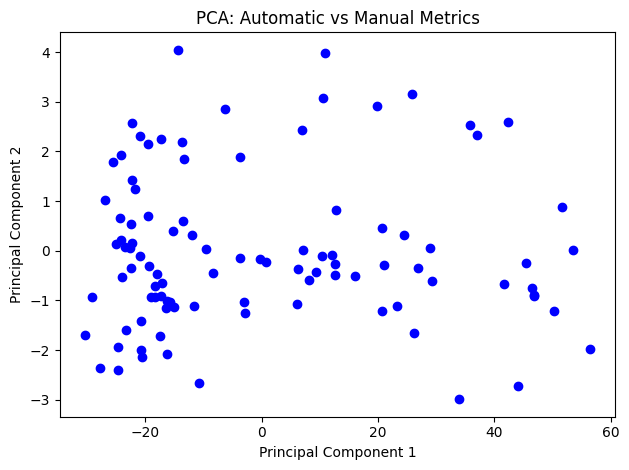

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data[auto_metrics + manual_metrics])
plt.scatter(pca_results[:, 0], pca_results[:, 1], c='b')
plt.title('PCA: Automatic vs Manual Metrics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()
